In [1]:
# 실행결과 경고메시지 출력 제외
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import shapiro
import matplotlib

## 예측
# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y~X1+X2+...)
import statsmodels.formula.api as smf
# Scaling 클래스
from sklearn.preprocessing import scale, minmax_scale, robust_scale
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가함수
from statsmodels.tools.eval_measures import rmse
# Ridge, Lasso, ElasticNet 패키지 불러오기
from sklearn.linear_model import Ridge, Lasso, ElasticNet
# 데이터 분할: train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Decision Tress
from sklearn.tree import DecisionTreeRegressor
# 예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화(.dot 확장자 파일 불러오기 등)
import graphviz
# MSE 계산
from sklearn.metrics import mean_squared_error
# MAE 계산
from sklearn.metrics import mean_absolute_error
# 예측/회귀 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
# Scale 변환: 평균, 표준편차 기준
from sklearn.preprocessing import StandardScaler

# 주성분 분석
from sklearn.decomposition import PCA
# 날짜 데이터 생성
from datetime import datetime
# 자기상관 함수, 부분 자기상관 함수
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# ARIMA
from statsmodels.tsa.arima_model import ARIMA


## 분류
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_curve, auc


# jupyter notebook 사용 시 그래프 자동 출력 옵션
# matplotlib 이용한 Background 그래프 실행 및 결과 확인
#%matplotlib inline

## 음수 표시
#plt.rc('axes', unicode_minus=False)
## 맑은 고딕 적용
#plt.rc("font", family="Malgun Gothic")

%matplotlib inline
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)

from sklearn.linear_model import LogisticRegression

|변수|변수 설명|변수 역할|변수 형태|
|---|---|---|---|
|PLATE_NO|Plate No|ID|범주형|
|ROLLING_DATE|작업시각|제외|연속형|
|SCALE|Scale불량|목표변수|범주형|
|SPEC|제품 규격|설명변수|범주형|
|STEEL_KIND|강종|설명변수|범주형|
|PT_THICK|Plate 두께|설명변수|연속형|
|PT_WIDTH|Plate 폭|설명변수|연속형|
|PT_LENGTH|Plate 길이|설명변수|연속형|
|PT_WEIGHT|Plate 중량|설명변수|연속형|
|FUR_NO|가열로 호기|설명변수|범주형|
|FUR_NO_ROW|가열로|작업순번|설명변수|연속형|
|FUR_HZ_TEMP|가열로|가열대 온도|설명변수|연속형|
|FUR_HZ_TIME|가열로|가열대 시간|설명변수|연속형|
|FUR_SZ_TEMP|가열로|균열대 온도|설명변수|연속형|
|FUR_SZ_TIME|가열로|균열대|시간|설명변수|연속형|
|FUR_TIME|가열로 시간|설명변수|연속형|
|FUR_EXTEMP|추출온도|설명변수|연속형|
|ROLLING_TEMP_T5|압연온도|설명변수|연속형|
|HSB|HSB적용(1-적용,0-미적용)|설명변수|범주형|
|ROLLING_DESCALING|압연 중 Descaling 횟수|설명변수|연속형|
|WORK_GR|작업조|설명변수|범주형|


# 1. 데이터 구성하기

In [2]:
data=pd.read_csv("../data/SCALE불량.csv", encoding='euc-kr')
data

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1133,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1135,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1121,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1127,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1128,873,적용,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,PB563502,2008-08-02:13:35:36,불량,NK-KA,C0,20.14,3580,38639,21870,3호기,...,1172,72,1164,62,245,1164,1005,적용,8,2조
716,PB563503,2008-08-02:13:35:02,양품,NV-A32,C0,15.08,3212,48233,18340,2호기,...,1150,61,1169,61,238,1169,947,적용,10,1조
717,PB563504,2008-08-02:14:40:00,양품,NV-A32,C0,16.60,3441,43688,19590,2호기,...,1169,65,1163,77,247,1163,948,적용,10,4조
718,PB563505,2008-08-02:13:35:19,양품,LR-A,C0,15.59,3363,48740,80240,3호기,...,1179,86,1163,45,243,1163,940,적용,10,2조


- 데이터 형태 확인 및 분류

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLATE_NO           720 non-null    object 
 1   ROLLING_DATE       720 non-null    object 
 2   SCALE              720 non-null    object 
 3   SPEC               720 non-null    object 
 4   STEEL_KIND         720 non-null    object 
 5   PT_THK             720 non-null    float64
 6   PT_WDTH            720 non-null    int64  
 7   PT_LTH             720 non-null    int64  
 8   PT_WGT             720 non-null    int64  
 9   FUR_NO             720 non-null    object 
 10  FUR_NO_ROW         720 non-null    int64  
 11  FUR_HZ_TEMP        720 non-null    int64  
 12  FUR_HZ_TIME        720 non-null    int64  
 13  FUR_SZ_TEMP        720 non-null    int64  
 14  FUR_SZ_TIME        720 non-null    int64  
 15  FUR_TIME           720 non-null    int64  
 16  FUR_EXTEMP         720 non

- 결측치 확인 및 처리

In [4]:
data.isnull().sum()

PLATE_NO             0
ROLLING_DATE         0
SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

In [5]:
# 같은 데이터인지 비교
data[data["FUR_SZ_TEMP"]!=data["FUR_EXTEMP"]]

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR


- 같은 데이터는 후에 singular matrix를 발생시켜 삭제시킴.

In [6]:
# ID 데이터 삭제
data.drop("PLATE_NO", axis=1, inplace=True)
# 시계열 데이터 삭제
data.drop("ROLLING_DATE", axis=1, inplace=True)
# FUR_EXTEMP 데이터 삭제
data.drop("FUR_EXTEMP", axis=1, inplace=True)

In [7]:
# 밀도 파생변수 추가
data["PT_DSY"]=data["PT_WGT"]/((data["PT_THK"]*data["PT_WDTH"]*data["PT_LTH"]))

In [8]:
# 범주형, 연속형 분리
data_char=data.select_dtypes(include="object")
data_numeric=data.select_dtypes(exclude="object")

- 빈도수 확인

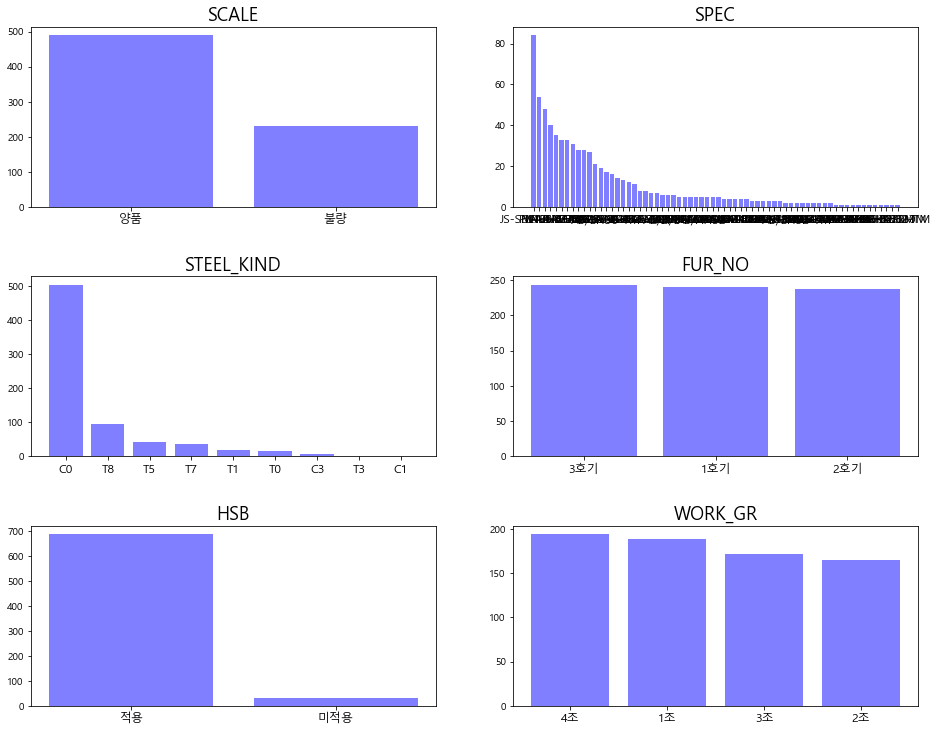

In [9]:
# 범주형 자료 빈도수 확인
check_col=data_char.columns
fig=plt.subplots(nrows=3, ncols=2, figsize=(13, 10))
plt.tight_layout(w_pad=5, h_pad=5)

for i in range(len(check_col)):
    df=data[check_col[i]].value_counts()
    plt.subplot(3, 2, i+1)
    plt.bar(df.index, df.values, color='blue', alpha=0.5)
    plt.title(check_col[i], fontsize=18)
    plt.xticks(fontsize=12)
plt.show()    

In [10]:
# 강종 분류 : C(일반강), T(TMCP강)
data["STEEL_KIND"]=data["STEEL_KIND"].apply(lambda x: x[0])
data[["STEEL_KIND"]].value_counts()

STEEL_KIND
C             511
T             209
dtype: int64

In [11]:
# SPEC 데이터 삭제
data.drop("SPEC", axis=1, inplace=True)

- 이상치 확인

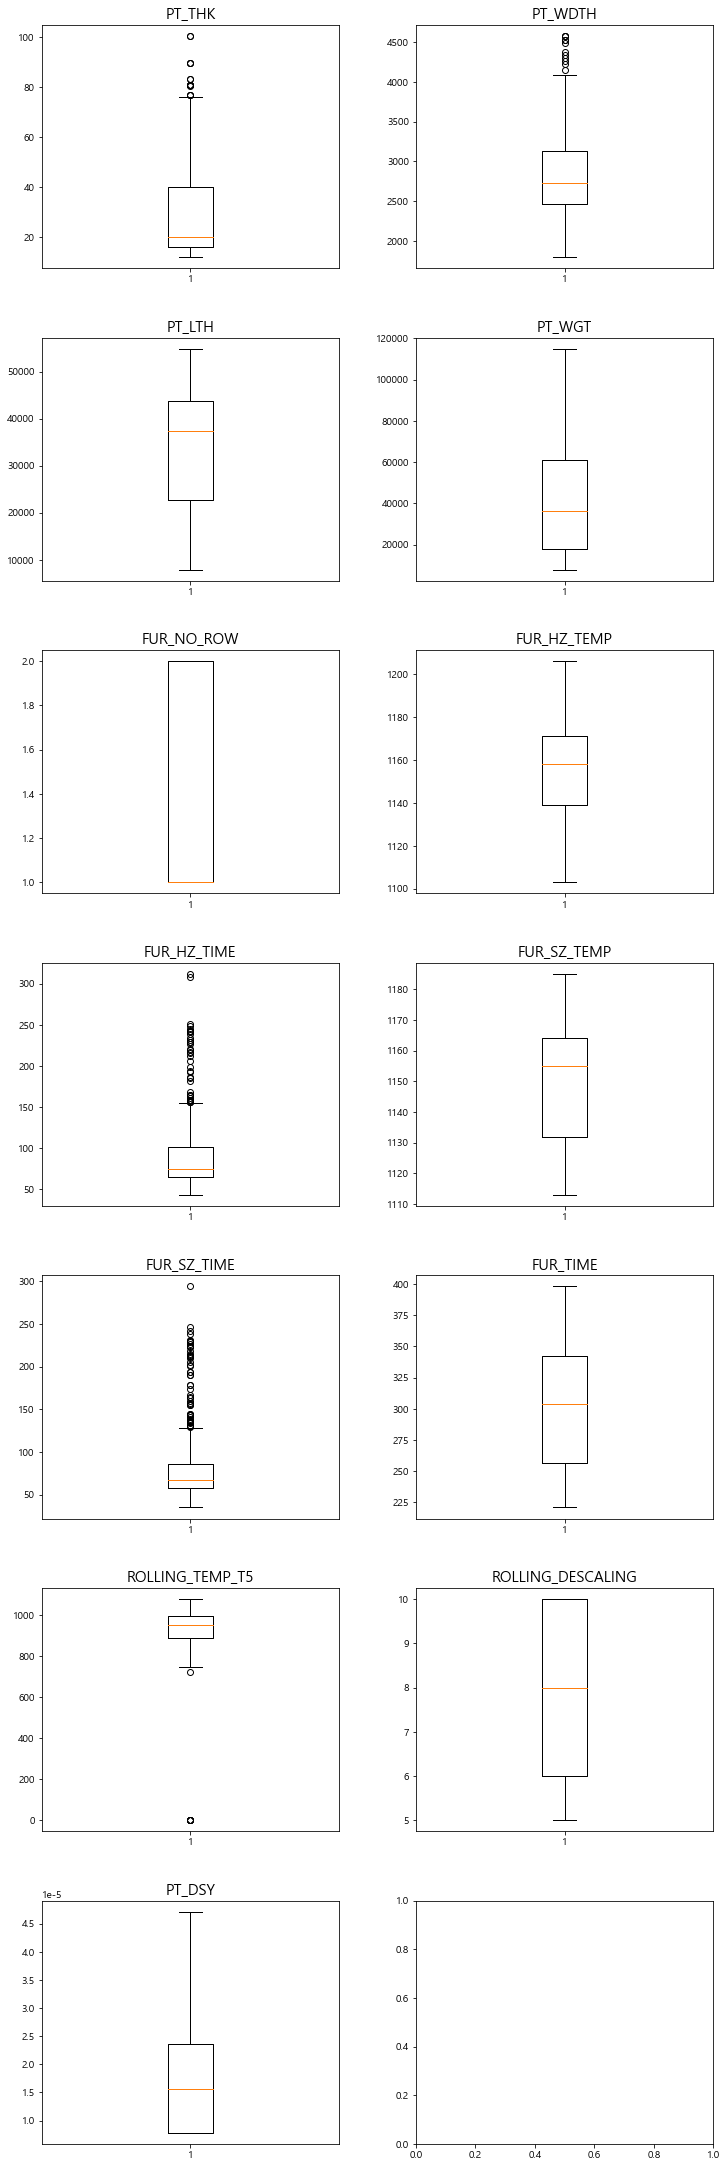

In [12]:
# 연속형 자료 이상치 확인
fig, axes=plt.subplots(nrows=7, ncols=2, figsize=(10, 30))
plt.tight_layout(w_pad=5, h_pad=5)
index=0
for i in data_numeric.columns:
    n1=index//2
    n2=index%2
    axes[n1, n2].boxplot(data[[i]])
    axes[n1, n2].set_title(i, fontsize=15)
    index+=1

In [13]:
# ROLLING_TEMP_T5 이상치 확인
data[data["ROLLING_TEMP_T5"]<200]

,SCALE,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,PT_DSY
41,양품,T,55.51,3765,11398,37400,3호기,2,1132,95,1128,80,341,0,적용,6,1조,0.000016
184,양품,C,16.09,2221,43596,61150,3호기,1,1169,64,1164,61,308,0,적용,10,3조,0.000039
185,양품,C,16.09,2221,43596,61150,3호기,2,1163,57,1166,67,303,0,적용,10,4조,0.000039
494,양품,T,80.82,2085,12919,17090,2호기,1,1133,89,1122,59,378,0,적용,6,2조,0.000008
495,양품,T,80.82,2085,13176,17430,1호기,2,1130,92,1124,61,362,0,적용,6,3조,0.000008
496,양품,T,40.35,2497,23592,37320,3호기,1,1119,109,1117,76,383,0,적용,6,3조,0.000016


In [14]:
# ROLLING_TEMP_T5 이상치 데이터 제외
data=data[data["ROLLING_TEMP_T5"]>200]
data.reset_index(drop=True, inplace=True)

In [15]:
# 이상치가 있는 칼럼명
outlier=["PT_THK", "PT_WDTH", "FUR_HZ_TIME", "FUR_SZ_TIME"]

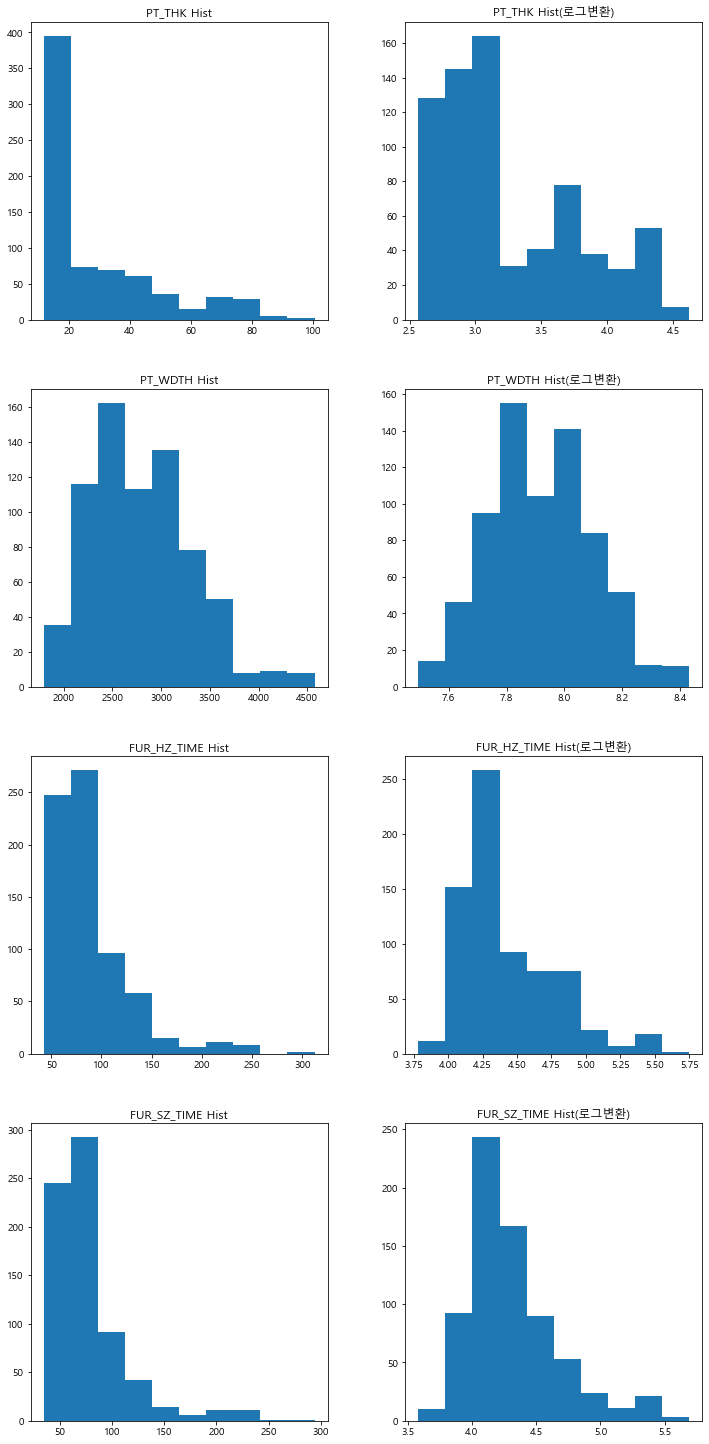

In [16]:
fig, axes=plt.subplots(nrows=4, ncols=2, figsize=(10, 20))
plt.tight_layout(w_pad=5, h_pad=5)

for i in range(len(outlier)):
    axes[i][0].hist(data[outlier[i]])
    axes[i][0].set_title(outlier[i]+" Hist")
    axes[i][1].hist(np.log1p(data[outlier[i]]))
    axes[i][1].set_title(outlier[i]+" Hist(로그변환)")

In [17]:
# 이상치가 있는 데이터 로그변환
for i in outlier:
    data[i]=np.log1p(data[i])

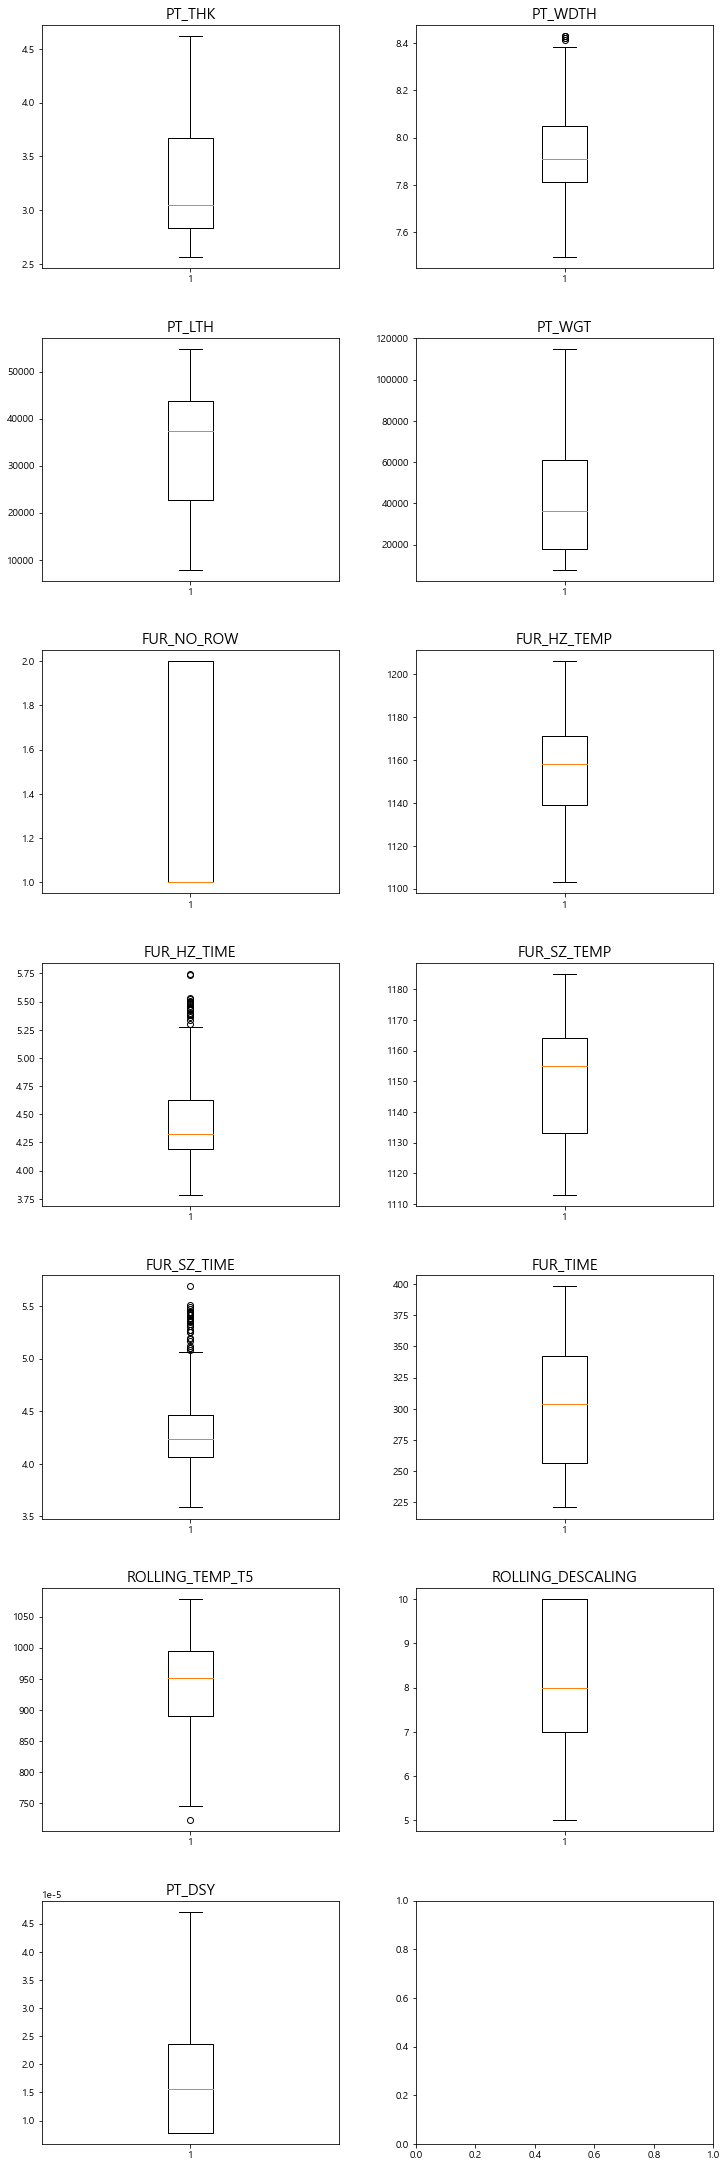

In [18]:
# 다시 이상치 확인
data_numeric=data.select_dtypes(exclude="object")

# 연속형 자료 이상치 확인
fig, axes=plt.subplots(nrows=7, ncols=2, figsize=(10, 30))
plt.tight_layout(w_pad=5, h_pad=5)
index=0
for i in data_numeric.columns:
    n1=index//2
    n2=index%2
    axes[n1, n2].boxplot(data[[i]])
    axes[n1, n2].set_title(i, fontsize=15)
    index+=1

- 요약 통계량 확인

In [19]:
# 요약 통계량
data_stat=data.describe().round(3)
data_stat

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,ROLLING_TEMP_T5,ROLLING_DESCALING,PT_DSY
count,714.000,714.000,714.000,714.000,714.000,714.000,714.000,714.000,714.000,714.000,714.000,714.000,714.0
mean,3.247,7.925,34404.029,41506.078,1.497,1155.459,4.430,1149.775,4.308,300.183,941.769,8.328,0.0
std,0.534,0.181,13799.227,24799.277,0.500,20.845,0.336,17.508,0.353,45.297,65.811,1.618,0.0
min,2.567,7.496,7893.000,7820.000,1.000,1103.000,3.784,1113.000,3.584,221.000,723.000,5.000,0.0
25%,2.838,7.812,22664.500,17780.000,1.000,1139.000,4.190,1133.000,4.060,257.000,891.000,7.000,0.0
50%,3.051,7.912,37380.000,36090.000,1.000,1158.000,4.324,1155.000,4.234,304.000,952.000,8.000,0.0
75%,3.675,8.048,43771.750,61120.000,2.000,1171.000,4.625,1164.000,4.466,342.000,995.000,10.000,0.0
max,4.618,8.429,54917.000,115080.000,2.000,1206.000,5.746,1185.000,5.687,398.000,1078.000,10.000,0.0


In [20]:
# 변동 계수
print("- 변동 계수 -")
display(data_stat.loc["std"]/data_stat.loc["mean"])

- 변동 계수 -


PT_THK               0.164460
PT_WDTH              0.022839
PT_LTH               0.401093
PT_WGT               0.597485
FUR_NO_ROW           0.334001
FUR_HZ_TEMP          0.018040
FUR_HZ_TIME          0.075847
FUR_SZ_TEMP          0.015227
FUR_SZ_TIME          0.081941
FUR_TIME             0.150898
ROLLING_TEMP_T5      0.069880
ROLLING_DESCALING    0.194284
PT_DSY                    NaN
dtype: float64

# 2. 탐색적 분석

- 제품 불량/양품별 크기척도 통계검정~Bar 그래프

불량 : ShapiroResult(statistic=0.8745877742767334, pvalue=7.212291744732036e-13)
양품 : ShapiroResult(statistic=0.884961724281311, pvalue=1.6671953459001219e-18) 

공분산 검정 : LeveneResult(statistic=54.394132198949016, pvalue=4.573780358649945e-13) 

[PT_THK]
Welch's t-test
t 통계랑 : -2.018
p-value : 0.044


불량 : ShapiroResult(statistic=0.9305598735809326, pvalue=5.651356271840768e-09)
양품 : ShapiroResult(statistic=0.9846935272216797, pvalue=5.704175418941304e-05) 

공분산 검정 : LeveneResult(statistic=1.9832913935543486, pvalue=0.1594805874598508) 

[PT_WDTH]
2-Sample t-test
t 통계랑 : -6.016
p-value : 0.0


불량 : ShapiroResult(statistic=0.9519952535629272, pvalue=6.038426931809227e-07)
양품 : ShapiroResult(statistic=0.9103861451148987, pvalue=2.7471970456042453e-16) 

공분산 검정 : LeveneResult(statistic=90.90966066161391, pvalue=2.3199263857686965e-20) 

[PT_LTH]
Welch's t-test
t 통계랑 : 3.005
p-value : 0.003


불량 : ShapiroResult(statistic=0.9492177367210388, pvalue=3.1024924851408286e-07)
양품 : ShapiroResult(s

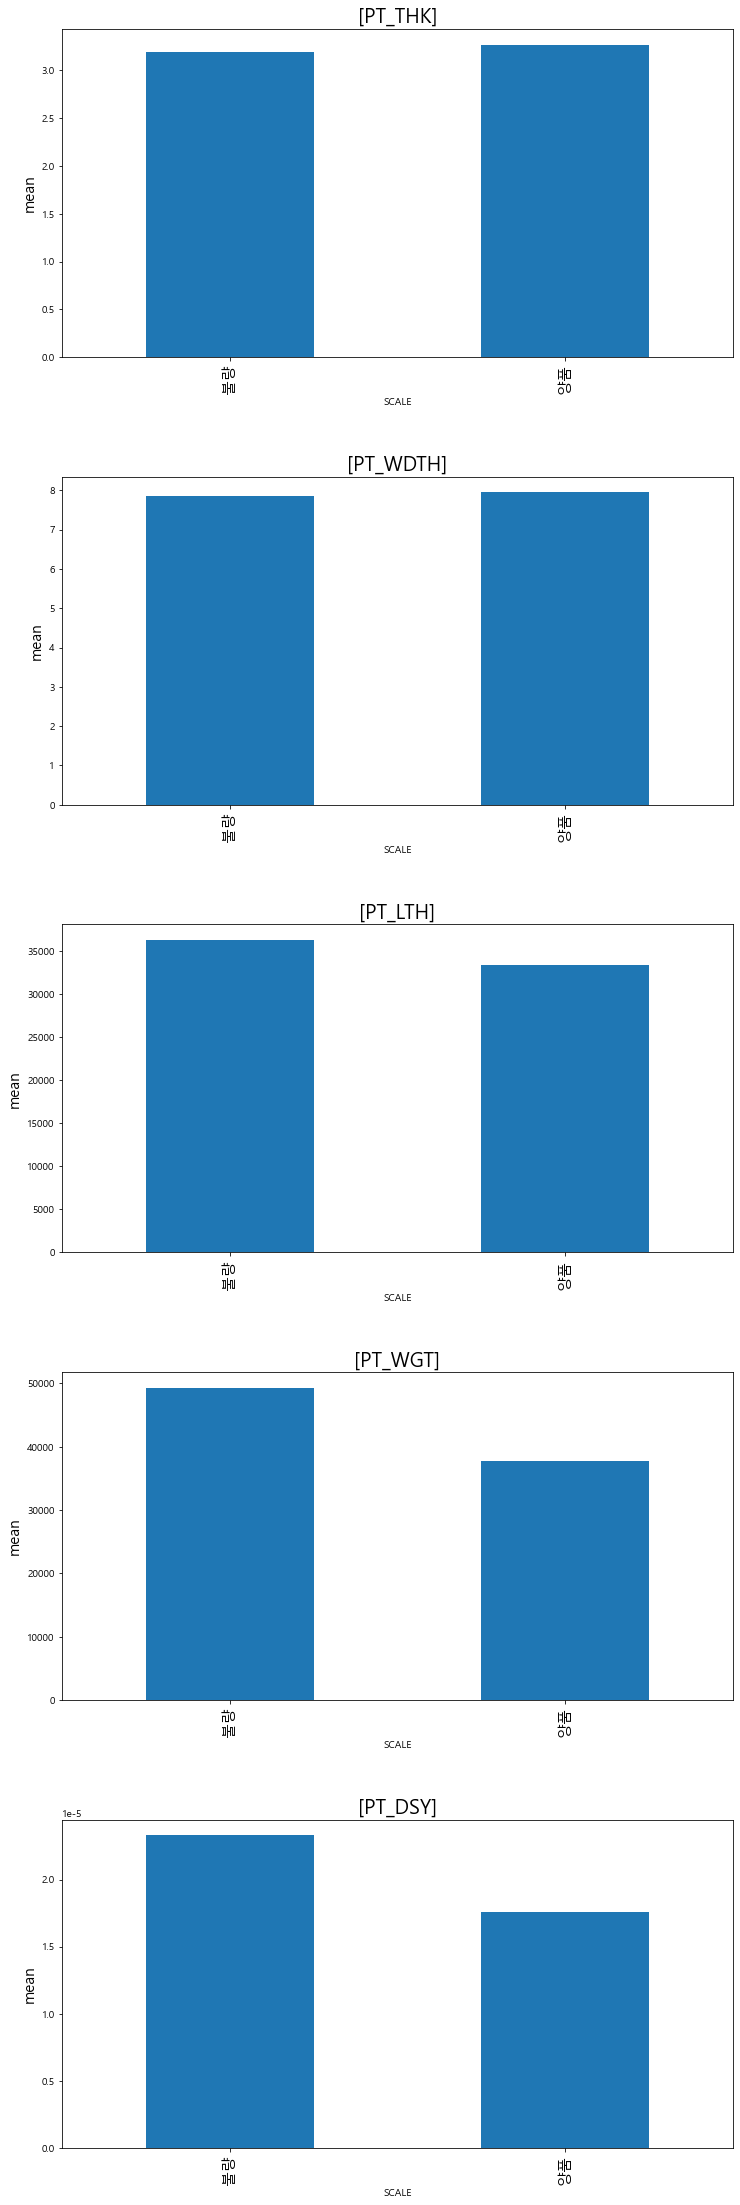

In [21]:
size=["PT_THK", "PT_WDTH", "PT_LTH", "PT_WGT", "PT_DSY"]
data_gr=data.groupby("SCALE").mean()
fig=plt.subplots(nrows=5, ncols=1, figsize=(10, 30))
plt.tight_layout(w_pad=5, h_pad=10)
index=1
for i in size:
    # 양품
    data_1=data[data["SCALE"]=="불량"][i]
    # 불량
    data_2=data[data["SCALE"]=="양품"][i]
    
    # 정규성 검정
    print("불량 :", shapiro(data_1))
    print("양품 :", shapiro(data_2), "\n")

# 공분산 검정
    t_, p_=stats.levene(data_1, data_2)
    print("공분산 검정 :", stats.levene(data_1, data_2), "\n")
    
    
    if p_>=0.05:
        t_result=stats.ttest_ind(data_1, data_2)
        t, p=t_result.statistic.round(3), t_result.pvalue.round(3)
        print("["+i+"]")
        print("2-Sample t-test")
        print("t 통계랑 : {}".format(t))
        print("p-value : {}\n\n".format(p))
    else :
        t_result=stats.ttest_ind(data_1, data_2, equal_var=False)
        t, p=t_result.statistic.round(3), t_result.pvalue.round(3)
        print("["+i+"]")
        print("Welch's t-test")
        print("t 통계랑 : {}".format(t))
        print("p-value : {}\n\n".format(p))
    
    plt.subplot(5, 1, index)
    data_gr[i].plot.bar()
    plt.title("["+i+"]", fontsize=20)
    plt.ylabel("mean", fontsize=15)
    plt.xticks(fontsize=15)
    index+=1

- 제품 불량/양품별 온도 통계검정~Bar 그래프

불량 : ShapiroResult(statistic=0.9871706962585449, pvalue=0.036228664219379425)
양품 : ShapiroResult(statistic=0.977914571762085, pvalue=1.0766409559437307e-06) 

공분산 검정 : LeveneResult(statistic=20.502614744430996, pvalue=6.979628910374333e-06) 

[FUR_HZ_TEMP]
Welch's t-test
t 통계랑 : 7.099
p-value : 0.0


불량 : ShapiroResult(statistic=0.9369524717330933, pvalue=2.0544639767194894e-08)
양품 : ShapiroResult(statistic=0.9207555651664734, pvalue=2.977714679919339e-15) 

공분산 검정 : LeveneResult(statistic=109.75842011780361, pvalue=5.530907116601136e-24) 

[FUR_SZ_TEMP]
Welch's t-test
t 통계랑 : 12.09
p-value : 0.0


불량 : ShapiroResult(statistic=0.8485233187675476, pvalue=2.7912114080545086e-14)
양품 : ShapiroResult(statistic=0.954498827457428, pvalue=4.793660607349537e-11) 

공분산 검정 : LeveneResult(statistic=25.279742473593302, pvalue=6.281313382746264e-07) 

[ROLLING_TEMP_T5]
Welch's t-test
t 통계랑 : 18.37
p-value : 0.0




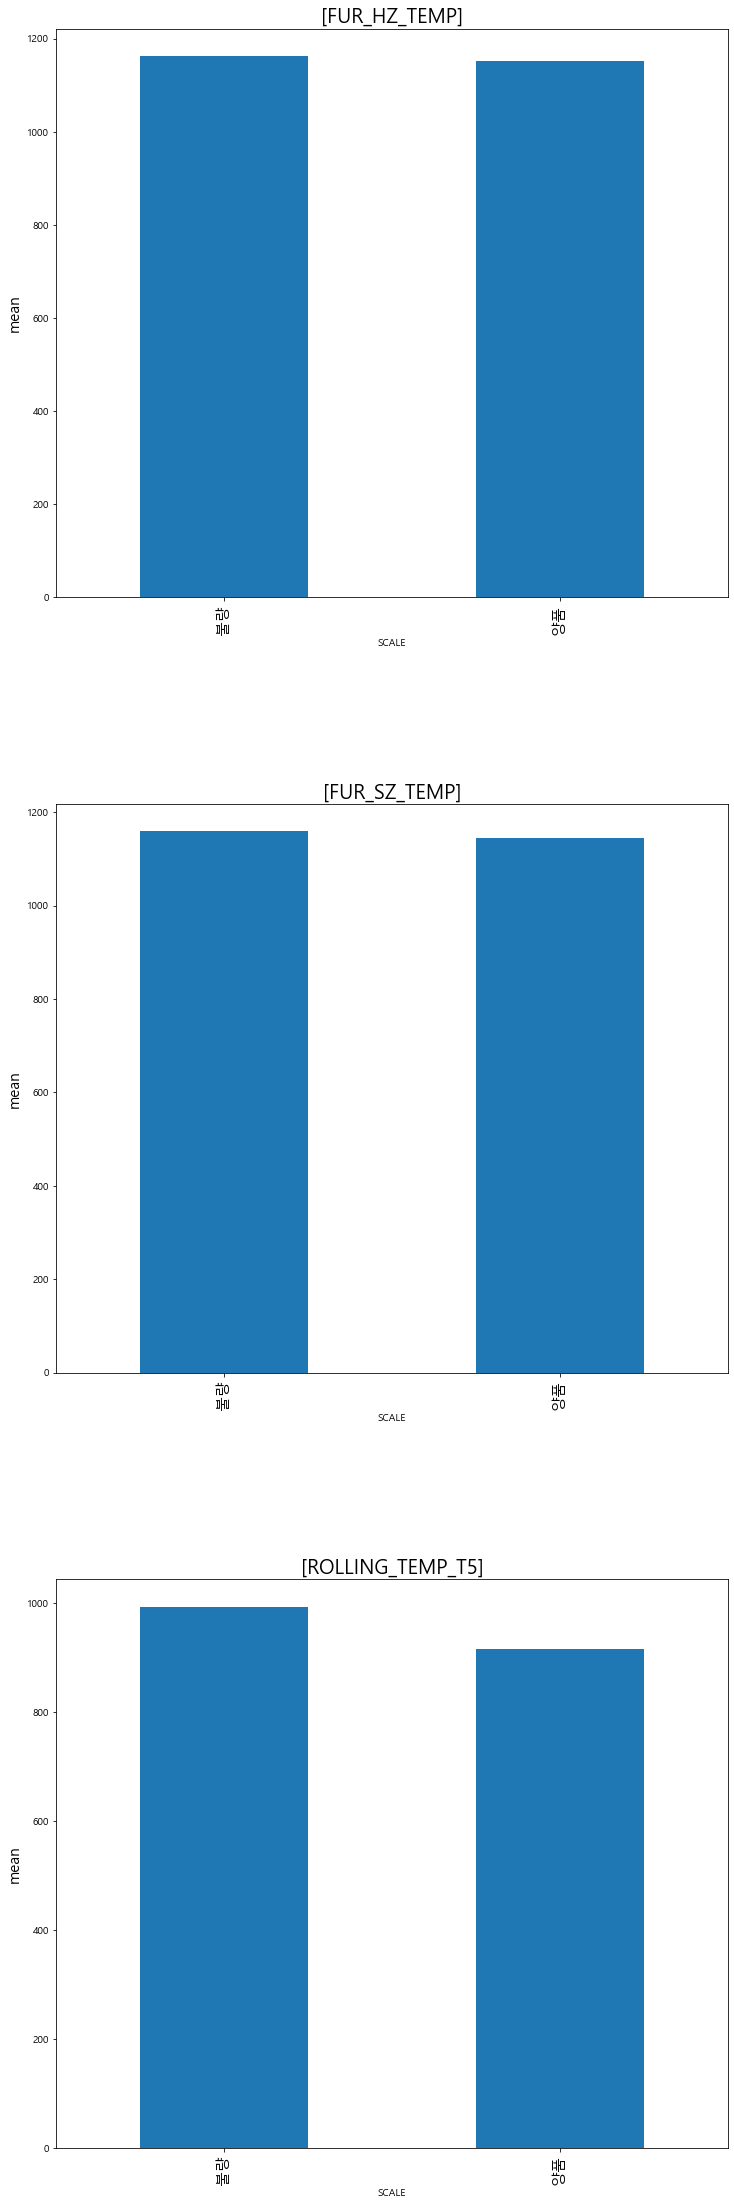

In [22]:
temp=["FUR_HZ_TEMP", "FUR_SZ_TEMP", "ROLLING_TEMP_T5"]
data_gr=data.groupby("SCALE").mean()
fig=plt.subplots(nrows=5, ncols=1, figsize=(10, 30))
plt.tight_layout(w_pad=5, h_pad=10)
index=1
for i in temp:
    data_1=data[data["SCALE"]=="불량"][i]
    data_2=data[data["SCALE"]=="양품"][i]
    
    # 정규성 검정
    print("불량 :", shapiro(data_1))
    print("양품 :", shapiro(data_2), "\n")

# 공분산 검정
    t_, p_=stats.levene(data_1, data_2)
    print("공분산 검정 :", stats.levene(data_1, data_2), "\n")
    
    
    if p_>=0.05:
        t_result=stats.ttest_ind(data_1, data_2)
        t, p=t_result.statistic.round(3), t_result.pvalue.round(3)
        print("["+i+"]")
        print("2-Sample t-test")
        print("t 통계랑 : {}".format(t))
        print("p-value : {}\n\n".format(p))
    else :
        t_result=stats.ttest_ind(data_1, data_2, equal_var=False)
        t, p=t_result.statistic.round(3), t_result.pvalue.round(3)
        print("["+i+"]")
        print("Welch's t-test")
        print("t 통계랑 : {}".format(t))
        print("p-value : {}\n\n".format(p))
    
    plt.subplot(3, 1, index)
    data_gr[i].plot.bar()
    plt.title("["+i+"]", fontsize=20)
    plt.ylabel("mean", fontsize=15)
    plt.xticks(fontsize=15)
    index+=1

- 제품 불량/양품별 시간 통계검정~Bar 그래프

불량 : ShapiroResult(statistic=0.8525715470314026, pvalue=4.5021617185204976e-14)
양품 : ShapiroResult(statistic=0.9189016222953796, pvalue=1.9146716022144837e-15) 

공분산 검정 : LeveneResult(statistic=0.01671297698134067, pvalue=0.8971736517163768) 

[FUR_HZ_TIME]
2-Sample t-test
t 통계랑 : 1.099
p-value : 0.272


불량 : ShapiroResult(statistic=0.9372071027755737, pvalue=2.1663300486807202e-08)
양품 : ShapiroResult(statistic=0.9166773557662964, pvalue=1.1376828798630753e-15) 

공분산 검정 : LeveneResult(statistic=34.55260715058769, pvalue=6.374814778174999e-09) 

[FUR_SZ_TIME]
Welch's t-test
t 통계랑 : -8.479
p-value : 0.0


불량 : ShapiroResult(statistic=0.9478622078895569, pvalue=2.2584005421322217e-07)
양품 : ShapiroResult(statistic=0.881401777267456, pvalue=8.728096529002544e-19) 

공분산 검정 : LeveneResult(statistic=34.16784176458804, pvalue=7.69781370743212e-09) 

[FUR_TIME]
Welch's t-test
t 통계랑 : -1.233
p-value : 0.218




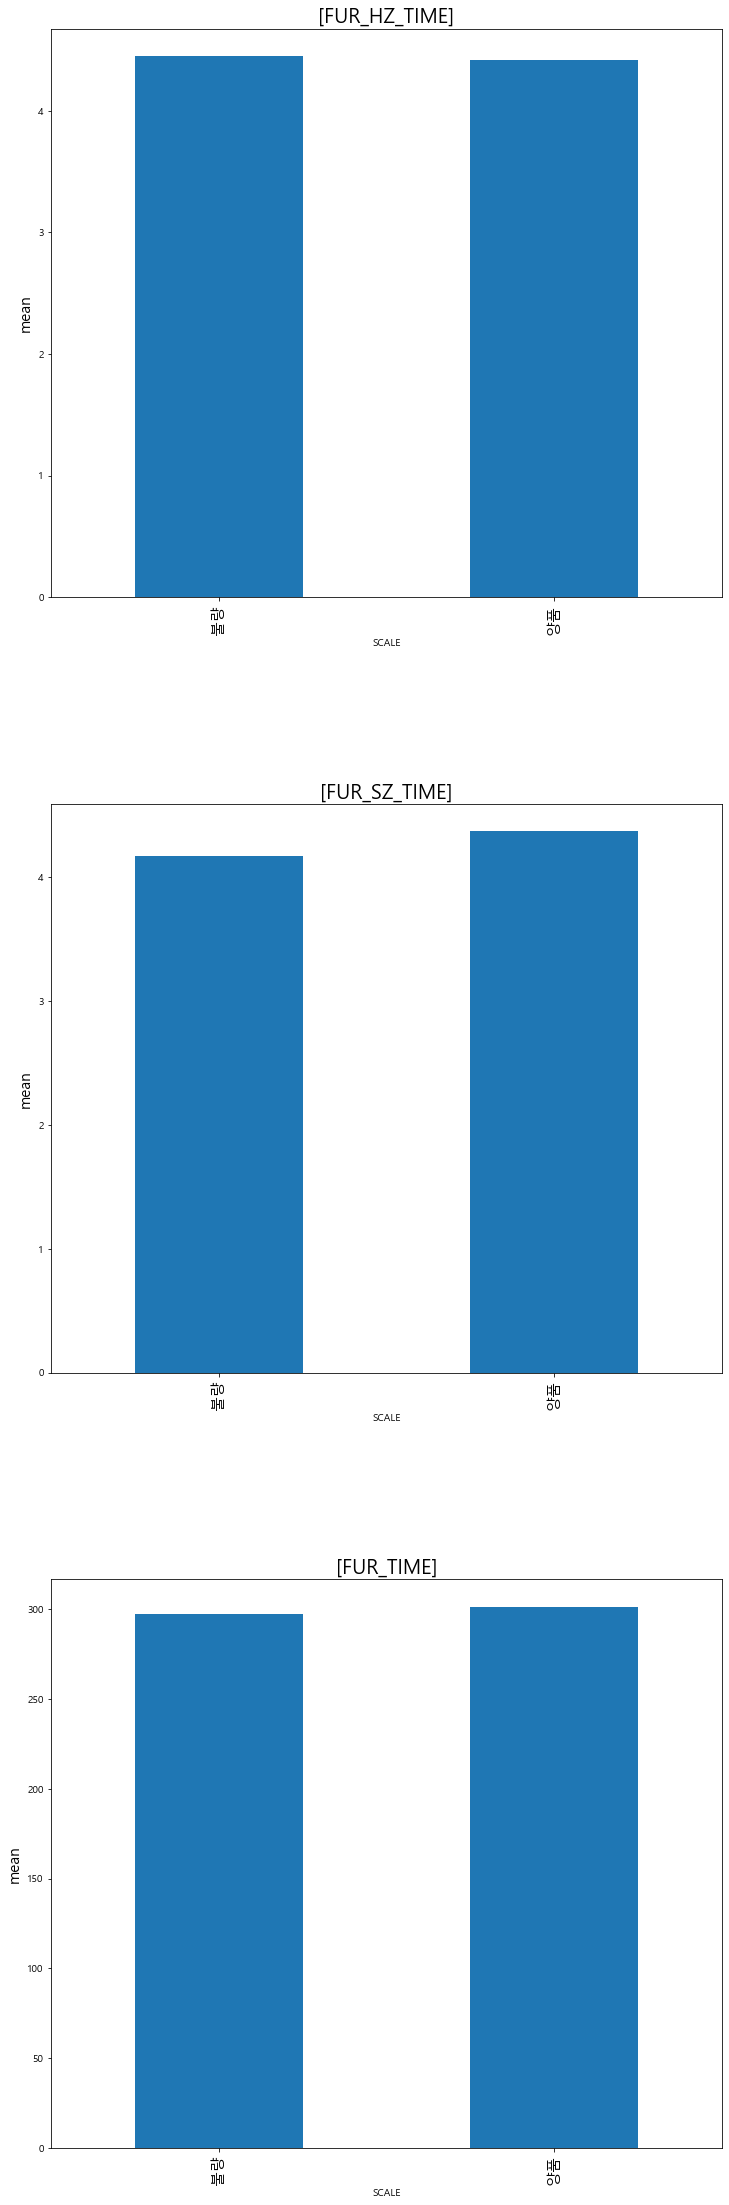

In [23]:
TIME=["FUR_HZ_TIME", "FUR_SZ_TIME", "FUR_TIME"]
data_gr=data.groupby("SCALE").mean()
fig=plt.subplots(nrows=5, ncols=1, figsize=(10, 30))
plt.tight_layout(w_pad=5, h_pad=10)
index=1
for i in TIME:
    data_1=data[data["SCALE"]=="불량"][i]
    data_2=data[data["SCALE"]=="양품"][i]
    
    # 정규성 검정
    print("불량 :", shapiro(data_1))
    print("양품 :", shapiro(data_2), "\n")

    # 공분산 검정
    t_, p_=stats.levene(data_1, data_2)
    print("공분산 검정 :", stats.levene(data_1, data_2), "\n")
    
    
    if p_>=0.05:
        t_result=stats.ttest_ind(data_1, data_2)
        t, p=t_result.statistic.round(3), t_result.pvalue.round(3)
        print("["+i+"]")
        print("2-Sample t-test")
        print("t 통계랑 : {}".format(t))
        print("p-value : {}\n\n".format(p))
    else :
        t_result=stats.ttest_ind(data_1, data_2, equal_var=False)
        t, p=t_result.statistic.round(3), t_result.pvalue.round(3)
        print("["+i+"]")
        print("Welch's t-test")
        print("t 통계랑 : {}".format(t))
        print("p-value : {}\n\n".format(p))
    
    plt.subplot(3, 1, index)
    data_gr[i].plot.bar()
    plt.title("["+i+"]", fontsize=20)
    plt.ylabel("mean", fontsize=15)
    plt.xticks(fontsize=15)
    index+=1

- STEEL_KIND 카이제곱 검정

In [24]:
data_T=data[data["STEEL_KIND"]=='T'].groupby("SCALE").count()["STEEL_KIND"]
data_C=data[data["STEEL_KIND"]=='C'].groupby("SCALE").count()["STEEL_KIND"]

df_kind=pd.DataFrame([data_T, data_C], index=["T", "C"])
df_kind.index.name="STEEL_KIND"

chi, pval, dof, expected=stats.chi2_contingency(df_kind.T)

# chi~square test 결과 출력
display(df_kind)
print("\n[chi-square test]")
print('chisq:{0:0.3f}'.format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom:{}'.format(dof))

SCALE,불량,양품
STEEL_KIND,,
T,17,188
C,214,295



[chi-square test]
chisq:74.528
p:0.000
degree pf freedom:1


- Scaling

In [25]:
# 이상치 제외 및 스케일링 후 다시 범주형, 연속형 분리
data_char=data.select_dtypes(include="object")
data_numeric=data.select_dtypes(exclude="object")

# 설명변수 표준화 적용 -> 표준화 회귀계수 산출 목적
scaler = StandardScaler()
# Scale 변환대상 변수 : 일반적으로 설명변수
cols=data_numeric.columns
# Scale 변환
np_scaled=scaler.fit_transform(data_numeric)
df_scaled=pd.DataFrame(np_scaled, columns=cols)

data=pd.concat([data_char, df_scaled], axis=1)

- 범주형 변수 dummy 변수 변환

In [26]:
data["SCALE"]=np.where(data["SCALE"]=="불량", 1, 0)

- 상관분석

In [27]:
# 수치형 데이터 상관관계 분석
for i in data_numeric:
    print("[Scale 불량과 "+i+" 간의 상관관계]\n")
    corr_, p_=stats.pointbiserialr(data["SCALE"], data[i])
    print("상관계수 : {}\n\n".format(corr_.round(3)))

[Scale 불량과 PT_THK 간의 상관관계]

상관계수 : -0.066


[Scale 불량과 PT_WDTH 간의 상관관계]

상관계수 : -0.22


[Scale 불량과 PT_LTH 간의 상관관계]

상관계수 : 0.097


[Scale 불량과 PT_WGT 간의 상관관계]

상관계수 : 0.219


[Scale 불량과 FUR_NO_ROW 간의 상관관계]

상관계수 : -0.023


[Scale 불량과 FUR_HZ_TEMP 간의 상관관계]

상관계수 : 0.245


[Scale 불량과 FUR_HZ_TIME 간의 상관관계]

상관계수 : 0.041


[Scale 불량과 FUR_SZ_TEMP 간의 상관관계]

상관계수 : 0.374


[Scale 불량과 FUR_SZ_TIME 간의 상관관계]

상관계수 : -0.263


[Scale 불량과 FUR_TIME 간의 상관관계]

상관계수 : -0.044


[Scale 불량과 ROLLING_TEMP_T5 간의 상관관계]

상관계수 : 0.552


[Scale 불량과 ROLLING_DESCALING 간의 상관관계]

상관계수 : -0.011


[Scale 불량과 PT_DSY 간의 상관관계]

상관계수 : 0.244




# 3. 모델링

### 1) Logistic

In [28]:
# train_test_split(test_size=test 데이터 베율, random_state: random seed)
df_train, df_test=train_test_split(data, test_size=0.3, random_state=4321)

print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (499, 18)
test data size : (215, 18)


In [29]:
# from_formula 함수를 이용하여 변수 역할 지정
# 분석 대상 이벤트="1"
log_model=Logit.from_formula("""SCALE~C(STEEL_KIND)+C(FUR_NO)+C(HSB)+C(WORK_GR)+PT_THK+PT_WDTH+PT_LTH+PT_WGT+\
FUR_NO_ROW+FUR_HZ_TEMP+FUR_HZ_TIME+FUR_SZ_TEMP+FUR_SZ_TIME+FUR_TIME+ROLLING_TEMP_T5+ROLLING_DESCALING+PT_DSY""", df_train)

# 적합
log_result=log_model.fit()
# 결과 출력
print(log_result.summary())

         Current function value: 0.261517
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  499
Model:                          Logit   Df Residuals:                      478
Method:                           MLE   Df Model:                           20
Date:                Wed, 10 Mar 2021   Pseudo R-squ.:                  0.5851
Time:                        22:13:17   Log-Likelihood:                -130.50
converged:                      False   LL-Null:                       -314.53
Covariance Type:            nonrobust   LLR p-value:                 8.330e-66
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             25.7522   1.42e+04      0.002      0.999   -2.77e+04    2.78e+04
C(STEEL_KIND)[T.T]     1.3643      1.456 

C:\Users\82105\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [30]:
# test 데이터 예측
y_pred=log_result.predict(df_test)
# 0과 1의 값을 가진 class로 변환
y_pred_class=(y_pred>0.5).astype(int)
y_pred_class.head()

684    0
87     0
200    1
145    1
454    0
dtype: int32

## 

In [31]:
# 실제 test 데이터의 목표변수와 test 데이터의 예측값 비교
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test["SCALE"], y_pred_class)))
print("Confustion Matrix: \n{}".format(confusion_matrix(df_test["SCALE"], y_pred_class)))

Accuracy: 0.856

Confustion Matrix: 
[[135  11]
 [ 20  49]]


<AxesSubplot:>

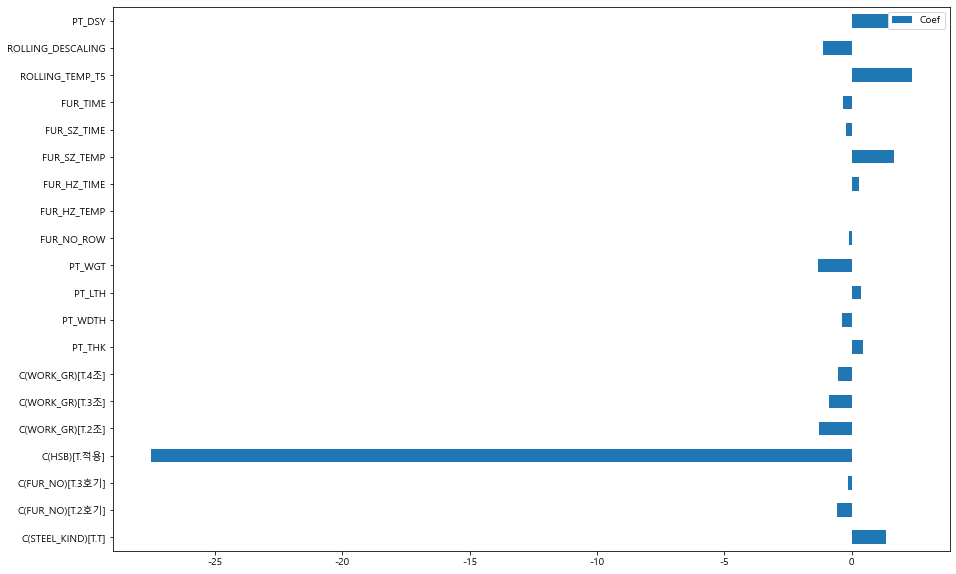

In [32]:
df_logistic_coef=pd.DataFrame({"Coef":log_result.params.values[1:]}, index=log_model.exog_names[1:])
df_logistic_coef.plot.barh(y="Coef", figsize = (15, 10))

# 의사결정나무

In [33]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_raw_dummy=pd.get_dummies(data)
# 더미변수 생성된 데이터의 상위 5개 row를 확인
df_raw_dummy.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,...,STEEL_KIND_T,FUR_NO_1호기,FUR_NO_2호기,FUR_NO_3호기,HSB_미적용,HSB_적용,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,0,0.481817,1.622591,-1.399249,-1.102663,-0.994413,-0.550140,0.987127,-0.958762,-0.607118,...,1,1,0,0,0,1,0,1,0,0
1,0,0.481817,1.622591,-1.399249,-1.102663,1.005618,-0.550140,1.135959,-0.844450,-0.905962,...,1,1,0,0,0,1,0,1,0,0
2,0,0.538409,1.489778,-1.103953,-0.943272,-0.994413,-1.270256,0.987127,-1.644633,-0.802809,...,1,0,1,0,0,1,0,0,1,0
3,0,0.538409,1.489778,-1.103953,-0.943272,1.005618,-0.166077,1.207674,-1.301698,-0.210698,...,1,0,1,0,0,1,0,0,1,0
4,0,0.796344,0.630508,-1.527970,-1.173279,-0.994413,-0.742171,1.412999,-1.244542,-1.181557,...,1,0,0,1,0,1,1,0,0,0


In [34]:
# 목표변수, 설명변수 데이터 지정
df_raw_y=df_raw_dummy["SCALE"]
df_raw_x=df_raw_dummy.drop("SCALE", axis=1, inplace=False)

In [35]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size=test 데이터 비율, random_state: random seed)
df_train_x, df_test_x, df_train_y, df_test_y=train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=4321)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (499, 24)
train data Y size : (499,)
test data X size : (215, 24)
test data Y size : (215,)


In [36]:
tree_uncustomized=DecisionTreeClassifier(random_state=4321)
tree_uncustomized.fit(df_train_x, df_train_y)
# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))


Accuracy on training set: 1.000
Accuracy on test set: 0.967


> 모델 정확도는 train 100%, test 96.7%로 모델은 train 데이터에 과적합

- max_depth: 최대 깊이 변경에 따른 모델 성능

In [37]:
# train 및 test 설명력 결과 저장
train_accuracy=[]; test_accuracy=[]
# min_samples_depth: 잎사귀 최소 자료 수
para_depth=[depth for depth in range(1, 20)]

for v_max_depth in para_depth:
    tree=DecisionTreeClassifier(random_state=4321, max_depth=v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_depth=pd.DataFrame()
df_accuracy_depth["Depth"]=para_depth
df_accuracy_depth["Trainaccuracy"]=train_accuracy
df_accuracy_depth["Testaccuracy"]=test_accuracy

# 모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,Trainaccuracy,Testaccuracy
0,1,0.888,0.884
1,2,0.940,0.907
2,3,0.970,0.935
3,4,0.974,0.935
4,5,0.980,0.949
5,6,0.980,0.949
6,7,0.982,0.949
7,8,0.982,0.949
8,9,0.996,0.958
9,10,0.996,0.958


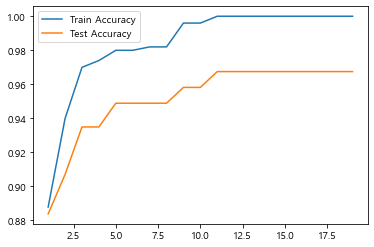

In [38]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle="-", label="Test Accuracy")
plt.legend()

> 최대 깊이 증가에 따라 모델의 정확도는 증가하다가 일정 수준에서 유지됨.
> Train/test 데이터의 성능 변화를 고려하여 11 선택

- min_samples_split: 분리 노드의 최소 자료 수 변경에 따른 모델 성능

In [39]:
# train 및 test 설명력 결과 저장
train_accuracy=[]; test_accuracy=[]
# min_samples_split: 잎사귀 최소 자료 수
para_split=[n_split*10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    tree=DecisionTreeClassifier(random_state=4321, min_samples_split=v_min_samples_split, max_depth=11)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_split=pd.DataFrame()
df_accuracy_split["MinSamplesSplit"]=para_split
df_accuracy_split["Trainaccuracy"]=train_accuracy
df_accuracy_split["Testaccuracy"]=test_accuracy

# 모델 정확도 확인
df_accuracy_split.round(3)

,MinSamplesSplit,Trainaccuracy,Testaccuracy
0,10,0.990,0.953
1,20,0.990,0.953
2,30,0.990,0.953
3,40,0.990,0.953
4,50,0.978,0.949
5,60,0.978,0.949
6,70,0.978,0.949
7,80,0.978,0.949
8,90,0.978,0.949
9,100,0.978,0.949


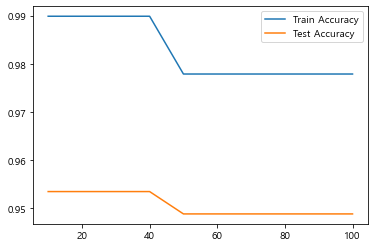

In [40]:
# 모델 정확도 그래프 확인
plt.plot(para_split, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle="-", label="Test Accuracy")
plt.legend()

> 분리 노드의 최소 자료 수 증가할수록 정확도가 떨어지다가 유지된다  

> train, test 정확도를 고려하여 40 선택

- min_samples_leaf: 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

In [41]:
# train 및 test 설명력 결과 저장
train_accuracy=[]; test_accuracy=[]
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf=[n_leaf*2 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    tree=DecisionTreeClassifier(random_state=4321, min_samples_leaf=v_min_samples_leaf, min_samples_split=40, max_depth=11)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_leaf=pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"]=para_leaf
df_accuracy_leaf["Trainaccuracy"]=train_accuracy
df_accuracy_leaf["Testaccuracy"]=test_accuracy

# 모델 정확도 확인
df_accuracy_leaf.round(3)

,MinSamplesLeaf,Trainaccuracy,Testaccuracy
0,2,0.990,0.953
1,4,0.990,0.953
2,6,0.986,0.953
3,8,0.986,0.953
4,10,0.970,0.935
5,12,0.974,0.949
6,14,0.974,0.949
7,16,0.972,0.940
8,18,0.960,0.940
9,20,0.960,0.940


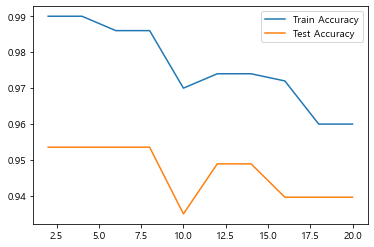

In [42]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle="-", label="Test Accuracy")
plt.legend()

> 잎사귀 노듸의 최소 자료 수 증가에 따라 모델의 정확도는 감소하며  
> Train/test 데이터의 성능 변화를 고려하여 8 선택 

In [43]:
# 그래프를 통해 얻은 최종 모델
tree_final1=DecisionTreeClassifier(random_state=4321, min_samples_split=40, min_samples_leaf=8, max_depth=11)
tree_final1.fit(df_train_x, df_train_y)

# 평가
y_pred=tree_final1.predict(df_test_x)
print("Score on training set: {:.3f}".format(tree_final1.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(tree_final1.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Score on training set: 0.986
Score on test set: 0.953
Confusion matrix: 
[[146   0]
 [ 10  59]]


> train 데이터의 정분류율은 98.6%, test 데이터의 정분류율은 95.3%로 train 데이터에 다소 과적합 되어 있지만  
> 성능이 좋은 모델이라고 할 수 있다.  

- GridSearchCV를 이용한 최적 parameter 찾기

In [44]:
estimator=DecisionTreeClassifier(random_state=4321)
# 구하고자 하는 parameter와 범위
param_grid={"max_depth":para_depth, "min_samples_split":para_split, "min_samples_leaf":para_leaf}
# 설명력이 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=20,
                       random_state=4321)

best parameter: 
{'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 20}

best score: 
0.976


In [45]:
# GridSearch를 통해 얻은 최종 모델
tree_final2=DecisionTreeClassifier(random_state=4321, min_samples_split=20, min_samples_leaf=4, max_depth=8)
tree_final2.fit(df_train_x, df_train_y)

# 평가
y_pred=tree_final2.predict(df_test_x)
print("Score on training set: {:.3f}".format(tree_final2.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(tree_final2.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Score on training set: 0.990
Score on test set: 0.953
Confusion matrix: 
[[146   0]
 [ 10  59]]


> train 데이터의 정분류율은 99%, test 데이터의 정분류율은 95.3%로 train 데이터에 다소 과적합 되어 있지만  
> 성능이 좋은 모델이라고 할 수 있다.  

- 최종 모델 선정

    - 두 모델의 성능은 같지만 과적합을 방지하기 위해 tree_final1 모델 선정

In [46]:
# 최종 모델
tree_final=DecisionTreeClassifier(random_state=4321, min_samples_split=40, min_samples_leaf=8, max_depth=11)
tree_final.fit(df_train_x, df_train_y)

# 평가
y_pred=tree_final.predict(df_test_x)
print("Score on training set: {:.3f}".format(tree_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Score on training set: 0.986
Score on test set: 0.953
Confusion matrix: 
[[146   0]
 [ 10  59]]


In [47]:
# 결론 도출
# 변수명 저장
v_feature_names=df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_names
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
10,ROLLING_TEMP_T5,0.590
18,HSB_미적용,0.197
7,FUR_SZ_TEMP,0.127
11,ROLLING_DESCALING,0.074
9,FUR_TIME,0.007
12,PT_DSY,0.004
3,PT_WGT,0.001
1,PT_WDTH,0.001
15,FUR_NO_1호기,0.000
22,WORK_GR_3조,0.000


Text(0, 0.5, '변수')

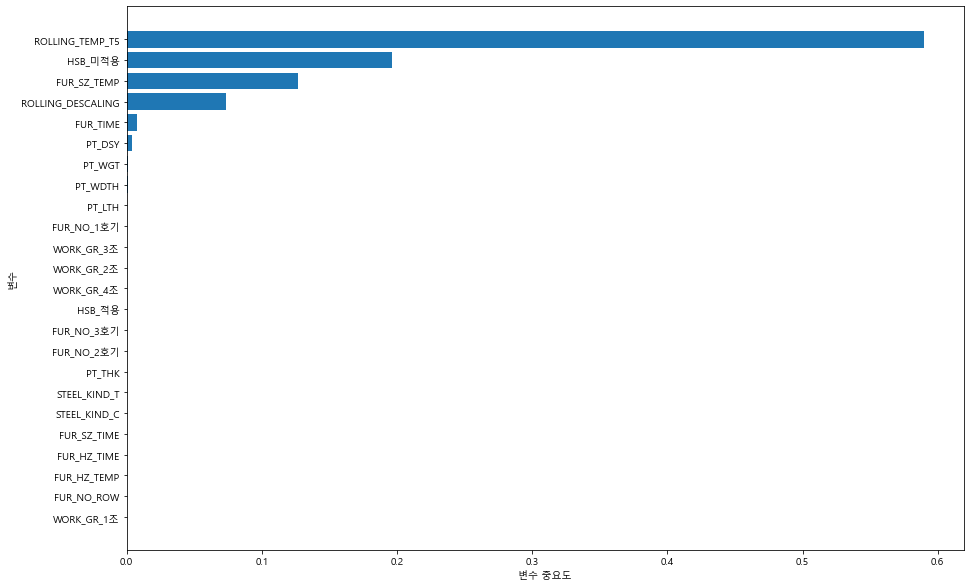

In [48]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates=range(len(df_importance))
plt.figure(figsize=(15, 10))
plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# 랜덤 포레스트

In [49]:
tree_uncustomized=RandomForestClassifier(random_state=4321)
tree_uncustomized.fit(df_train_x, df_train_y)
# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))


Accuracy on training set: 1.000
Accuracy on test set: 0.940


> 모델 정확도는 train 100%, test 94%로 모델은 train 데이터에 과대적합

- n_estimators: 트리 수 변경에 따른 모델 성능

In [50]:
# train 및 test 설명력 결과 저장
train_accuracy=[]; test_accuracy=[]
# min_samples_n_tree: 잎사귀 최소 자료 수
para_n_tree=[n_tree*10 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree:
    tree=RandomForestClassifier(random_state=4321, n_estimators=v_n_estimators)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_n_tree=pd.DataFrame()
df_accuracy_n_tree["n_estimators"]=para_n_tree
df_accuracy_n_tree["Trainaccuracy"]=train_accuracy
df_accuracy_n_tree["Testaccuracy"]=test_accuracy

# 모델 정확도 확인
df_accuracy_n_tree.round(3)

,n_estimators,Trainaccuracy,Testaccuracy
0,10,1.0,0.940
1,20,1.0,0.935
2,30,1.0,0.940
3,40,1.0,0.940
4,50,1.0,0.940
5,60,1.0,0.940
6,70,1.0,0.935
7,80,1.0,0.935
8,90,1.0,0.940
9,100,1.0,0.940


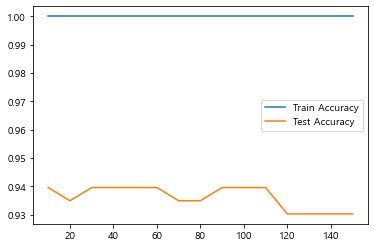

In [51]:
# 모델 정확도 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle="-", label="Test Accuracy")
plt.legend()

> 생성하는 결정 트리 수 증가에 따라 모델의 정확도는 증가한다

- n_estimators: 트리 수 변경에 따른 모델 oob error 변화

Text(0.5, 0, 'n_estimators')

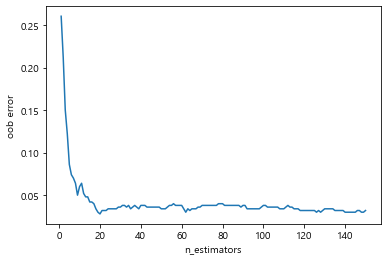

In [52]:
# error 저장 리스트
oob_error=[]

for v_n_estimator in range(1, 151):
    rf=RandomForestClassifier(n_estimators=v_n_estimator, oob_score=True, random_state=4321)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1-rf.oob_score_)
    
# 그래프로 표현
plt.plot(range(1, 151), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")

> 생성하는 결정 트리 수 증가에 따라 모델의 정확도는 증가하며(OOB Error는 감소)  

> 모델의 특성을 고려하여 30 선택  

- max_depth: 최대 깊이 변경에 따른 모델 성능

In [53]:
# train 및 test 설명력 결과 저장
train_accuracy=[]; test_accuracy=[]
# min_samples_depth: 잎사귀 최소 자료 수
para_depth=[depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf=RandomForestClassifier(random_state=4321, max_depth=v_max_depth, n_estimators=30)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_depth=pd.DataFrame()
df_accuracy_depth["Depth"]=para_depth
df_accuracy_depth["Trainaccuracy"]=train_accuracy
df_accuracy_depth["Testaccuracy"]=test_accuracy

# 모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,Trainaccuracy,Testaccuracy
0,1,0.870,0.865
1,2,0.940,0.902
2,3,0.940,0.902
3,4,0.956,0.912
4,5,0.968,0.930
5,6,0.968,0.935
6,7,0.974,0.930
7,8,0.984,0.935
8,9,0.994,0.940
9,10,0.998,0.935


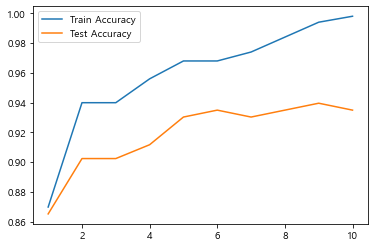

In [54]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle="-", label="Test Accuracy")
plt.legend()

> 최대 깊이 증가에 따라 모델의 정확도는 증가하며  
> Train/test 데이터의 성능 변화를 고려하여 9 선택

- min_samples_split: 분리 노드의 최소 자료 수 변경에 따른 모델 성능

In [55]:
# train 및 test 설명력 결과 저장
train_accuracy=[]; test_accuracy=[]
# min_samples_split: 잎사귀 최소 자료 수
para_split=[n_split*10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    rf=RandomForestClassifier(random_state=4321, n_estimators=30, min_samples_split=v_min_samples_split, max_depth=9)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_split=pd.DataFrame()
df_accuracy_split["MinSamplesSplit"]=para_split
df_accuracy_split["Trainaccuracy"]=train_accuracy
df_accuracy_split["Testaccuracy"]=test_accuracy

# 모델 정확도 확인
df_accuracy_split.round(3)

,MinSamplesSplit,Trainaccuracy,Testaccuracy
0,10,0.980,0.944
1,20,0.972,0.935
2,30,0.972,0.935
3,40,0.970,0.940
4,50,0.970,0.935
5,60,0.968,0.930
6,70,0.970,0.930
7,80,0.964,0.907
8,90,0.966,0.921
9,100,0.964,0.926


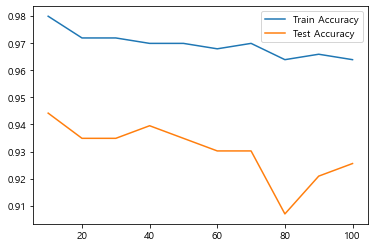

In [56]:
# 모델 정확도 그래프 확인
plt.plot(para_split, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle="-", label="Test Accuracy")
plt.legend()

> 분리 노드의 최소 자료 수 증가에 따라 모델의 정확도는 감소하나  
> test 데이터의 성능 변화를 고려하면 10 선택

- min_samples_leaf: 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

In [57]:
# train 및 test 설명력 결과 저장
train_accuracy=[]; test_accuracy=[]
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf=[n_leaf*10 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    rf=RandomForestClassifier(random_state=4321, min_samples_leaf=v_min_samples_leaf, min_samples_split=10, n_estimators=30, max_depth=9)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_leaf=pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"]=para_leaf
df_accuracy_leaf["Trainaccuracy"]=train_accuracy
df_accuracy_leaf["Testaccuracy"]=test_accuracy

# 모델 정확도 확인
df_accuracy_leaf.round(3)

,MinSamplesLeaf,Trainaccuracy,Testaccuracy
0,10,0.936,0.902
1,20,0.886,0.879
2,30,0.886,0.870
3,40,0.886,0.879
4,50,0.880,0.879
5,60,0.884,0.879
6,70,0.874,0.884
7,80,0.856,0.865
8,90,0.828,0.851
9,100,0.760,0.753


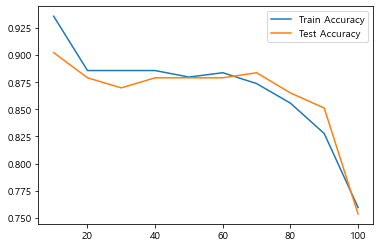

In [58]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle="-", label="Test Accuracy")
plt.legend()

> 잎사귀 노듸의 최소 자료 수 증가에 따라 모델의 정확도는 감소하며  
> Train/test 데이터의 성능 변화를 고려하여 70 선택  

In [59]:
# 그래프를 통해 얻은 최종 모델
rf_final1=RandomForestClassifier(random_state=4321, min_samples_leaf=70, min_samples_split=10, n_estimators=30, max_depth=9)
rf_final1.fit(df_train_x, df_train_y)

# 평가
y_pred=rf_final1.predict(df_test_x)
print("Accuracy on training set: {0:.3f}\n".format(rf_final1.score(df_train_x, df_train_y)))
print("Accuracy on test set: {0:.3f}\n".format(rf_final1.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.874

Accuracy on test set: 0.884

Confusion matrix: 
[[143   3]
 [ 22  47]]


> train 데이터의 정분류율은 87.4%, test 데이터의 정분류율은 88.4%로 test 데이터에 다소 과소적합 되어 있다.

- GridSearchCV를 이용한 최적 parameter 찾기

In [60]:
estimator=RandomForestClassifier(random_state=4321)
# 구하고자 하는 parameter와 범위
param_grid={"max_depth":para_depth, "min_samples_split":para_split, "min_samples_leaf":para_leaf}
# 설명력이 높은 최적 parameter 찾기
grid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_rf.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

best estimator model: 
RandomForestClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=60,
                       random_state=4321)

best parameter: 
{'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 60}

best score: 
0.906


In [61]:
# GridSearchCV를 통해 얻은 최종 모델
rf_final2=RandomForestClassifier(random_state=4321, n_estimators=30, min_samples_leaf=10, min_samples_split=60, max_depth=3)
rf_final2.fit(df_train_x, df_train_y)

# 평가
y_pred=rf_final2.predict(df_test_x)
print("Accuracy on training set: {0:.3f}\n".format(rf_final2.score(df_train_x, df_train_y)))
print("Accuracy on test set: {0:.3f}\n".format(rf_final2.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.926

Accuracy on test set: 0.898

Confusion matrix: 
[[146   0]
 [ 22  47]]


> train 데이터의 정분류율은 92.6%, test 데이터의 정분류율은 89.8%로 train 데이터에 과소적합 되어 있다.

- 최종 모델 선정

    - 모델의 성능과 과적합 문제 등 여러 사항을 고려하여 rf_final2 모델 선정

In [62]:
# 최종 모델
rf_final=RandomForestClassifier(random_state=4321, n_estimators=30, min_samples_leaf=10, min_samples_split=60, max_depth=3)
rf_final.fit(df_train_x, df_train_y)

# 평가
y_pred=rf_final.predict(df_test_x)
print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Score on training set: 0.926
Score on test set: 0.898
Confusion matrix: 
[[146   0]
 [ 22  47]]


> train 데이터의 정분류율은 92.6%, test 데이터의 정분류율은 89.8%로 train 데이터에 과소적합 되어 있다.

In [63]:
# 결론 도출
# 변수명 저장
v_feature_names=df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_names
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
10,ROLLING_TEMP_T5,0.590
18,HSB_미적용,0.197
7,FUR_SZ_TEMP,0.127
11,ROLLING_DESCALING,0.074
9,FUR_TIME,0.007
12,PT_DSY,0.004
3,PT_WGT,0.001
1,PT_WDTH,0.001
15,FUR_NO_1호기,0.000
22,WORK_GR_3조,0.000


Text(0, 0.5, '변수')

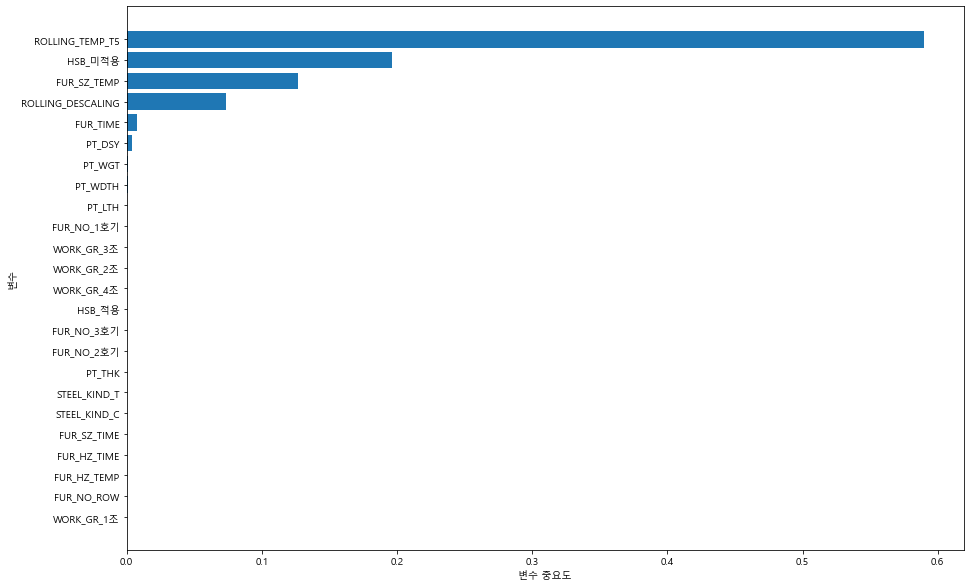

In [64]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates=range(len(df_importance))
plt.figure(figsize=(15, 10))
plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# 그래디언트 부스팅

In [65]:
tree_uncustomized=GradientBoostingClassifier(random_state=4321)
tree_uncustomized.fit(df_train_x, df_train_y)
# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))


Accuracy on training set: 1.000
Accuracy on test set: 0.967


> 모델 정확도는 train 100%, test 96.7%로 train 데이터에 과적합 되어있다.

- learning_rate : 학습률 변경에 따른 모델 성능

In [66]:
# train 및 test 설명력 결과 저장
train_accuracy=[]; test_accuracy=[]
# min_samples_lr: 잎사귀 최소 자료 수
para_lr=[lr*0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb=GradientBoostingClassifier(random_state=4321, learning_rate=v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_lr=pd.DataFrame()
df_accuracy_lr["LearningRate"]=para_lr
df_accuracy_lr["Trainaccuracy"]=train_accuracy
df_accuracy_lr["Testaccuracy"]=test_accuracy

# 모델 정확도 확인
df_accuracy_lr.round(3)

,LearningRate,Trainaccuracy,Testaccuracy
0,0.1,1.0,0.967
1,0.2,1.0,0.967
2,0.3,1.0,0.967
3,0.4,1.0,0.972
4,0.5,1.0,0.972
5,0.6,1.0,0.967
6,0.7,1.0,0.967
7,0.8,1.0,0.958
8,0.9,1.0,0.972


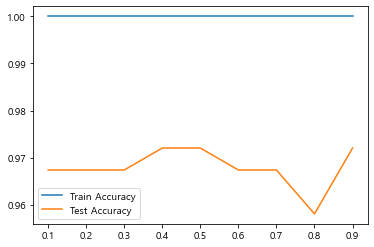

In [67]:
# 모델 정확도 그래프 확인
plt.plot(para_lr, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_lr, test_accuracy, linestyle="-", label="Test Accuracy")
plt.legend()

> 학습률 증가에 따라 test 데이터의 정분류율은 증가하다가 감소, 0.8 이후부터 다시 증가

> test 데이터의 성능을 고려하여 0.4 선택

- n_estimators: 트리 수 변경에 따른 모델 성능

In [68]:
# train 및 test 설명력 결과 저장
train_accuracy=[]; test_accuracy=[]
# min_samples_n_tree: 잎사귀 최소 자료 수
para_n_tree=[n_tree*10 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree:
    gb=GradientBoostingClassifier(random_state=4321, n_estimators=v_n_estimators, learning_rate=0.4)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_n_tree=pd.DataFrame()
df_accuracy_n_tree["n_estimators"]=para_n_tree
df_accuracy_n_tree["Trainaccuracy"]=train_accuracy
df_accuracy_n_tree["Testaccuracy"]=test_accuracy

# 모델 정확도 확인
df_accuracy_n_tree.round(3)

,n_estimators,Trainaccuracy,Testaccuracy
0,10,0.996,0.953
1,20,1.000,0.967
2,30,1.000,0.958
3,40,1.000,0.958
4,50,1.000,0.958
5,60,1.000,0.963
6,70,1.000,0.972
7,80,1.000,0.972
8,90,1.000,0.972
9,100,1.000,0.972


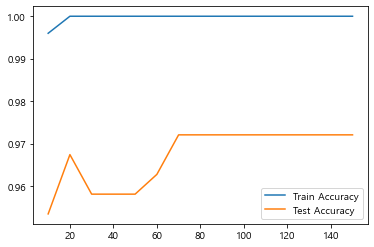

In [69]:
# 모델 정확도 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle="-", label="Test Accuracy")
plt.legend()

> 생성하는 결정 트리 수 증가에 따라 모델의 정분류율은 증가하다가 유지됨

> Train/test 데이터의 성능 변화를 고려하여 70 선택  


- max_depth: 최대 깊이 변경에 따른 모델 성능

In [70]:
# train 및 test 설명력 결과 저장
train_accuracy=[]; test_accuracy=[]
# min_samples_depth: 잎사귀 최소 자료 수
para_depth=[depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb=GradientBoostingClassifier(random_state=4321, learning_rate=0.4, max_depth=v_max_depth, n_estimators=70)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_depth=pd.DataFrame()
df_accuracy_depth["Depth"]=para_depth
df_accuracy_depth["Trainaccuracy"]=train_accuracy
df_accuracy_depth["Testaccuracy"]=test_accuracy

# 모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,Trainaccuracy,Testaccuracy
0,1,0.996,0.963
1,2,1.000,0.972
2,3,1.000,0.972
3,4,1.000,0.972
4,5,1.000,0.972
5,6,1.000,0.977
6,7,1.000,0.991
7,8,1.000,0.986
8,9,1.000,0.986
9,10,1.000,0.977


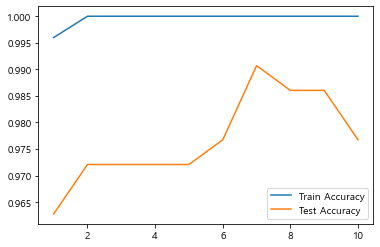

In [71]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle="-", label="Test Accuracy")
plt.legend()

> 깊이가 커질수록 test 데이터의 정분류율은 증가하다가 7 이후부터 감소한다

> Train/test 데이터의 성능 변화를 고려하여 7 선택

- min_samples_split: 분리 노드의 최소 자료 수 변경에 따른 모델 성능

In [72]:
# train 및 test 설명력 결과 저장
train_accuracy=[]; test_accuracy=[]
# min_samples_split: 잎사귀 최소 자료 수
para_split=[n_split*10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    gb=GradientBoostingClassifier(random_state=4321, learning_rate=0.4, n_estimators=70, min_samples_split=v_min_samples_split, max_depth=7)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_split=pd.DataFrame()
df_accuracy_split["MinSamplesSplit"]=para_split
df_accuracy_split["Trainaccuracy"]=train_accuracy
df_accuracy_split["Testaccuracy"]=test_accuracy

# 모델 정확도 확인
df_accuracy_split.round(3)

,MinSamplesSplit,Trainaccuracy,Testaccuracy
0,10,1.0,0.981
1,20,1.0,0.967
2,30,1.0,0.995
3,40,1.0,0.967
4,50,1.0,0.977
5,60,1.0,0.991
6,70,1.0,0.991
7,80,1.0,0.991
8,90,1.0,0.977
9,100,1.0,0.981


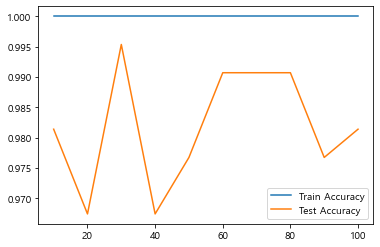

In [73]:
# 모델 정확도 그래프 확인
plt.plot(para_split, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle="-", label="Test Accuracy")
plt.legend()

> train 데이터의 정분류율은 일정하고 test 데이터의 정분류율은 분리노드의 자료수 증가에 따라 증가와 감소를 반복  
> test 데이터 성능을 고려하여 30 선택

- min_samples_leaf: 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

In [74]:
# train 및 test 설명력 결과 저장
train_accuracy=[]; test_accuracy=[]
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf=[n_leaf*2 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    gb=GradientBoostingClassifier(random_state=4321, min_samples_leaf=v_min_samples_leaf, learning_rate=0.4, n_estimators=70, min_samples_split=30, max_depth=7)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_leaf=pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"]=para_leaf
df_accuracy_leaf["Trainaccuracy"]=train_accuracy
df_accuracy_leaf["Testaccuracy"]=test_accuracy

# 모델 정확도 확인
df_accuracy_leaf.round(3)

,MinSamplesLeaf,Trainaccuracy,Testaccuracy
0,2,1.0,0.991
1,4,1.0,0.972
2,6,1.0,0.972
3,8,1.0,0.972
4,10,1.0,0.977
5,12,1.0,0.972
6,14,1.0,0.940
7,16,1.0,0.935
8,18,1.0,0.935
9,20,1.0,0.940


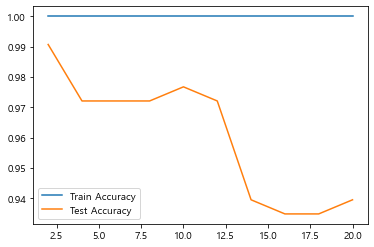

In [75]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle="-", label="Test Accuracy")
plt.legend()

> 잎사귀 노듸의 최소 자료 수 증가에 따라 모델의 정확도는 감소하며  
> test 데이터의 성능을 고려하여 2 선택    


In [76]:
# 그래프를 통해 얻은 최종 모델
gb_final1=GradientBoostingClassifier(random_state=4321, min_samples_leaf=2, learning_rate=0.4, n_estimators=70, min_samples_split=30, max_depth=7)
gb_final1.fit(df_train_x, df_train_y)

# 예측
y_pred=gb_final1.predict(df_test_x)
# train 데이터 셋 정확도
print("Accuracy on training set: {0:.3f}\n".format(gb_final1.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {0:.3f}\n".format(gb_final1.score(df_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 1.000

Accuracy on test set: 0.991

Confusion matrix: 
[[146   0]
 [  2  67]]


> 모델 정확도는 train 100%, test 99.1%로 유사한 수준이며 안정적인 모델이다

- GridSearchCV를 이용한 최적 parameter 찾기

In [77]:
estimator=GradientBoostingClassifier(random_state=4321)
# 구하고자 하는 parameter와 범위
param_grid={"learning_rate":para_lr, "max_depth":para_depth, "min_samples_split":para_split, "min_samples_leaf":para_leaf}
# 설명력이 높은 최적 parameter 찾기
grid_gb = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_gb.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_gb.best_estimator_))
print("\nbest parameter: \n{}".format(grid_gb.best_params_))
print("\nbest score: \n{}".format(grid_gb.best_score_.round(3)))

best estimator model: 
GradientBoostingClassifier(learning_rate=0.4, max_depth=6, min_samples_leaf=2,
                           min_samples_split=50, random_state=4321)

best parameter: 
{'learning_rate': 0.4, 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 50}

best score: 
0.992


In [78]:
# GridSearchCV 통해 얻은 최종 모델
gb_final2=GradientBoostingClassifier(random_state=4321, min_samples_leaf=2, learning_rate=0.4, n_estimators=50, min_samples_split=50, max_depth=6)
gb_final2.fit(df_train_x, df_train_y)

# 예측
y_pred=gb_final2.predict(df_test_x)
# train 데이터 셋 정확도
print("Accuracy on training set: {0:.3f}\n".format(gb_final2.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {0:.3f}\n".format(gb_final2.score(df_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 1.000

Accuracy on test set: 0.986

Confusion matrix: 
[[146   0]
 [  3  66]]


> 모델 정확도는 train 100%, test 98.6%로 유사한 수준이며 매우 안정적인 모델이다

- 최종 모델 선정

    - 모델의 성능을 고려하여 gb_final1 모델 선정

In [79]:
# 최종 모델
gb_final=GradientBoostingClassifier(random_state=4321, min_samples_leaf=2, learning_rate=0.4, n_estimators=70, min_samples_split=30, max_depth=7)
gb_final.fit(df_train_x, df_train_y)

# 평가
y_pred=gb_final.predict(df_test_x)
print("Score on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Score on training set: 1.000
Score on test set: 0.991
Confusion matrix: 
[[146   0]
 [  2  67]]


> 모델 정확도는 train 100%, test 99.1%로 유사한 수준이며 매우 안정적인 모델이다

In [80]:
# 결론 도출
# 변수명 저장
v_feature_names=df_train_x.columns

# gb.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_names
df_importance["Importance"] = gb_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
10,ROLLING_TEMP_T5,0.566
18,HSB_미적용,0.178
7,FUR_SZ_TEMP,0.122
11,ROLLING_DESCALING,0.069
0,PT_THK,0.023
9,FUR_TIME,0.016
19,HSB_적용,0.011
8,FUR_SZ_TIME,0.005
1,PT_WDTH,0.004
12,PT_DSY,0.003


Text(0, 0.5, '변수')

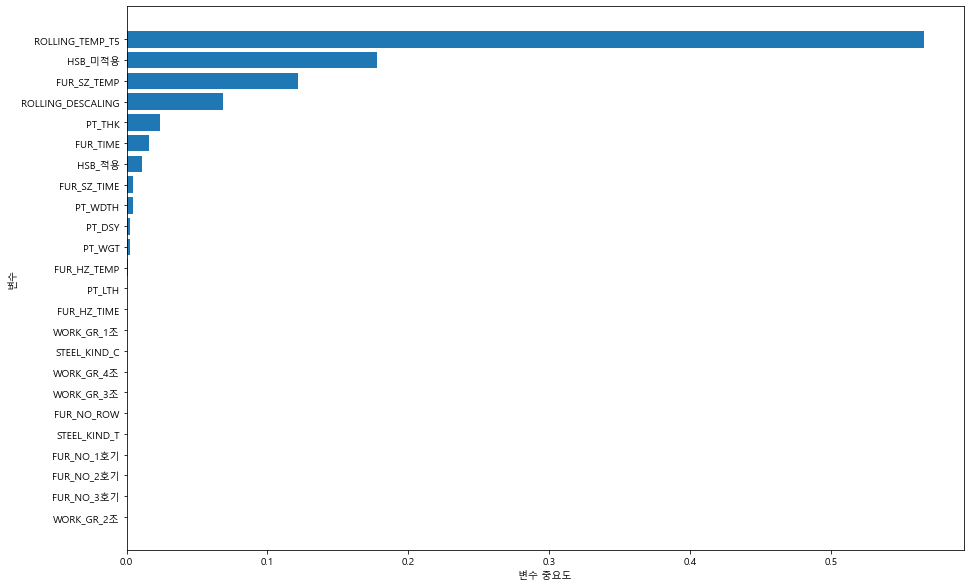

In [81]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates=range(len(df_importance))
plt.figure(figsize=(15, 10))
plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# 서포트 벡터 머신

In [82]:
svm_uncustomized=SVC(random_state=4321)
svm_uncustomized.fit(df_train_x, df_train_y)
# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(svm_uncustomized.score(df_test_x, df_test_y)))


Accuracy on training set: 0.920
Accuracy on test set: 0.851


> 모델 정확도는 train 92%, test 85.1%로 성능이 양호하고 유사한 수준

- C: 규제에 대한 강도 변경

In [83]:
# train 및 test 설명력 결과 저장
train_accuracy=[]; test_accuracy=[]
#c: 규제(0.01, 0.1, 1, 10)
#para_c=[10**c for c in range(-2, 2)]
para_c=[c*0.1 for c in range(1, 10)]#C 변화 구간 변경

for v_C in para_c:
    svm=SVC(random_state=4321, C=v_C)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_c=pd.DataFrame()
df_accuracy_c["C"]=para_c
df_accuracy_c["Trainaccuracy"]=train_accuracy
df_accuracy_c["Testaccuracy"]=test_accuracy

# 모델 정확도 확인
df_accuracy_c.round(3)

,C,Trainaccuracy,Testaccuracy
0,0.1,0.856,0.814
1,0.2,0.856,0.837
2,0.3,0.870,0.823
3,0.4,0.874,0.833
4,0.5,0.880,0.837
5,0.6,0.896,0.851
6,0.7,0.904,0.860
7,0.8,0.912,0.856
8,0.9,0.918,0.856


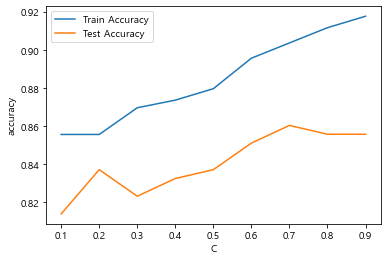

In [84]:
# 모델 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle="-", label="Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend()

> C가 1 이상이면 train 데이터 이용한 모델의 정확도는 1(과대적합)  
> test 데이터의 성능을 고려하여 0.7 선택


- Gamma: 훈련 샘플이 미치는 영향의 범위를 변경

In [85]:
# train 및 test 설명력 결과 저장
train_accuracy=[]; test_accuracy=[]
# c: 규제(0.01, 0.1, 1, 10)
#para_gamma=[10**gamma for gamma in range(-2, 2)]
para_gamma=[c*0.1 for c in range(1, 10)]#C 변화 구간 변경

for v_gamma in para_gamma:
    svm=SVC(random_state=4321, C=0.7, gamma=v_gamma)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_gamma=pd.DataFrame()
df_accuracy_gamma["gamma"]=para_gamma
df_accuracy_gamma["Trainaccuracy"]=train_accuracy
df_accuracy_gamma["Testaccuracy"]=test_accuracy

# 모델 정확도 확인
df_accuracy_gamma.round(3)

,gamma,Trainaccuracy,Testaccuracy
0,0.1,0.918,0.837
1,0.2,0.932,0.828
2,0.3,0.948,0.800
3,0.4,0.964,0.777
4,0.5,0.974,0.753
5,0.6,0.982,0.707
6,0.7,0.986,0.693
7,0.8,0.990,0.688
8,0.9,0.994,0.688


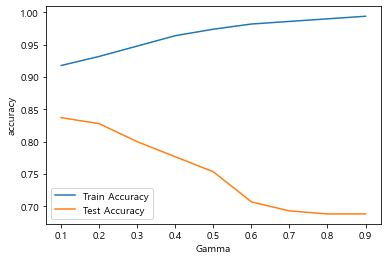

In [86]:
# 모델 정확도 그래프 확인
plt.plot(para_gamma, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle="-", label="Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Gamma")
plt.legend()

> gamma 값이 커질수록 성능이 떨어지다가 일정해진다.  
> 모델의 성능을 고려하여 0.1 선택


In [87]:
# 그래프를 통해 얻은 최종 모델
svc_final1=SVC(random_state=4321, gamma=0.1, C=0.7)
svc_final1.fit(df_train_x, df_train_y)

# 예측
y_pred=svc_final1.predict(df_test_x)
# train 데이터 셋 정확도
print("Accuracy on training set: {0:.3f}\n".format(svc_final1.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {0:.3f}\n".format(svc_final1.score(df_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.918

Accuracy on test set: 0.837

Confusion matrix: 
[[135  11]
 [ 24  45]]


> train 데이터의 분류율은 91.8%, test 데이터의 분류율은 83.7%로 train 데이터에 다소 과적합 되어있다.

- GridSearchCV를 이용한 최적 parameter 찾기

In [88]:
estimator=SVC(random_state=4321)
# 구하고자 하는 parameter와 범위
param_grid={"C":para_c, "gamma":para_gamma}
# 정확도가 높은 최적 parameter 찾기
grid_svc = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_svc.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_svc.best_estimator_))
print("\nbest parameter: \n{}".format(grid_svc.best_params_))
print("\nbest score: \n{}".format(grid_svc.best_score_.round(3)))

best estimator model: 
SVC(C=0.9, gamma=0.1, random_state=4321)

best parameter: 
{'C': 0.9, 'gamma': 0.1}

best score: 
0.864


In [89]:
# GridSearchCV를 통해 얻은 최종 모델
svc_final2=SVC(random_state=4321, gamma=0.1, C=0.9)
svc_final2.fit(df_train_x, df_train_y)

# 예측
y_pred=svc_final2.predict(df_test_x)
# train 데이터 셋 정확도
print("Accuracy on training set: {0:.3f}\n".format(svc_final2.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {0:.3f}\n".format(svc_final2.score(df_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.930

Accuracy on test set: 0.842

Confusion matrix: 
[[134  12]
 [ 22  47]]


> train 데이터의 분류율은 93.0%, test 데이터의 분류율은 84.2%로 train 데이터에 다소 과적합 되어있다.

- 최종 모델 선정

    - 모델의 성능을 고려하여 최종 모델로 svc_final2 선택

In [90]:
# 최종 모델
svc_final=SVC(random_state=4321, gamma=0.1, C=0.9)
svc_final.fit(df_train_x, df_train_y)

# 평가
y_pred=svc_final.predict(df_test_x)
print("Score on training set: {:.3f}".format(svc_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(svc_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Score on training set: 0.930
Score on test set: 0.842
Confusion matrix: 
[[134  12]
 [ 22  47]]


> train 데이터의 분류율은 93.0%, test 데이터의 분류율은 84.2%로 train 데이터에 다소 과적합 되어있다.

# 인공 신경망

In [91]:
nn_uncustomized=MLPClassifier(random_state=4321)
nn_uncustomized.fit(df_train_x, df_train_y)
# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(nn_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(nn_uncustomized.score(df_test_x, df_test_y)))


Accuracy on training set: 0.958
Accuracy on test set: 0.860


> 모델 정확도는 train 95.8%, test 86%로 모델은 train 데이터에 대해 과적합

- Hidden Layer : 은닉층 변경

In [92]:
# train 및 test 설명력 결과 저장
train_accuracy=[]; test_accuracy=[]
# hidden_layer_sizes: 은닉층 변경 (20, 40, 60, 80, 100, 120, 140, 160)
para_hidden=[20*hidden for hidden in range(1, 9)]

for v_hidden in para_hidden:
    #nn=MLPClassifier(random_state=4321, hidden_layer_sizes=v_hidden)
    nn=MLPClassifier(random_state=4321, hidden_layer_sizes=(v_hidden, v_hidden))
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_hidden=pd.DataFrame()
df_accuracy_hidden["HiddenLayer"]=para_hidden
df_accuracy_hidden["Trainaccuracy"]=train_accuracy
df_accuracy_hidden["Testaccuracy"]=test_accuracy

# 모델 정확도 확인
df_accuracy_hidden.round(3)

,HiddenLayer,Trainaccuracy,Testaccuracy
0,20,0.952,0.870
1,40,0.998,0.865
2,60,1.000,0.884
3,80,1.000,0.884
4,100,1.000,0.879
5,120,1.000,0.865
6,140,1.000,0.870
7,160,1.000,0.860


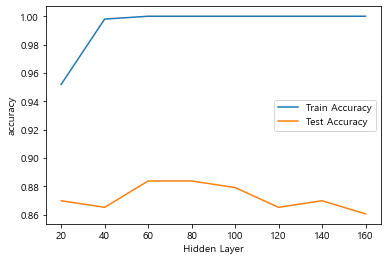

In [93]:
# 모델 정확도 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle="-", label="Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Hidden Layer")
plt.legend()

> 은닉층 구조가 복잡할수록 과적합이 일어남.   
> 모델의 성능을 고려하여 (60, 60) 선택

- Activation : 활성화 함수 변경

In [94]:
# train 및 test 설명력 결과 저장
train_accuracy=[]; test_accuracy=[]
# activation 변경
para_function=["logistic", "tanh", "relu"]

for v_function in para_function:
    nn=MLPClassifier(random_state=4321, activation=v_function)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_function=pd.DataFrame()
df_accuracy_function["ActivationFunction"]=para_function
df_accuracy_function["Trainaccuracy"]=train_accuracy
df_accuracy_function["Testaccuracy"]=test_accuracy

# 모델 정확도 확인
df_accuracy_function.round(3)

,ActivationFunction,Trainaccuracy,Testaccuracy
0,logistic,0.890,0.856
1,tanh,0.922,0.870
2,relu,0.958,0.860


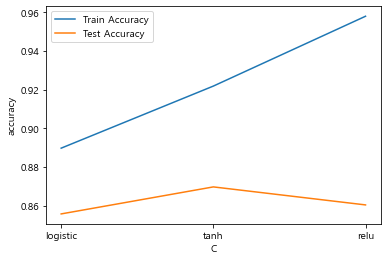

In [95]:
# 모델 정확도 그래프 확인
plt.plot(para_function, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle="-", label="Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend()

> "logistic" 함수 적용시 모델의 정확도가 상대적으로 낮음.  
> 모델의 성능과 과적합을 고려하여 tanh 선택


- Slover : 가중치 최적화 변경

In [96]:
# train 및 test 설명력 결과 저장
train_accuracy=[]; test_accuracy=[]
# activation 변경
para_solver=["lbfgs", "sgd", "adam"]

for v_solver in para_solver:
    nn=MLPClassifier(random_state=4321, solver=v_solver, activation="tanh", hidden_layer_sizes=(60, 60))
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_solver=pd.DataFrame()
df_accuracy_solver["Solver"]=para_solver
df_accuracy_solver["Trainaccuracy"]=train_accuracy
df_accuracy_solver["Testaccuracy"]=test_accuracy

# 모델 정확도 확인
df_accuracy_solver.round(3)

,Solver,Trainaccuracy,Testaccuracy
0,lbfgs,1.000,0.865
1,sgd,0.860,0.842
2,adam,0.982,0.874


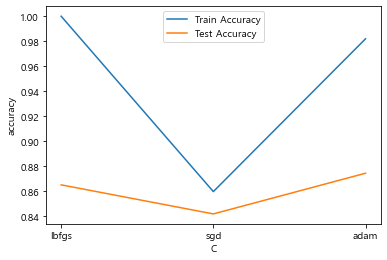

In [97]:
# 모델 정확도 그래프 확인
plt.plot(para_solver, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_solver, test_accuracy, linestyle="-", label="Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend()


> "adam" 최적화 모델이 가장 높은 정확도를 보이고 "sgd" 모델보다 과적합이 일어남.    
> 데이터 성능을 고려하여 "adam" 모델 선정

- Mini Batch 변경

In [98]:
# train 및 test 설명력 결과 저장
train_accuracy=[]; test_accuracy=[]
# Mini Batch 변경
para_batch=[20*batch for batch in range(1, 10)]

for v_batch in para_batch:
    nn=MLPClassifier(random_state=4321, batch_size=v_batch, solver="adam", activation="tanh", hidden_layer_sizes=(60, 60))
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_batch=pd.DataFrame()
df_accuracy_batch["Mini Batch"]=para_batch
df_accuracy_batch["Trainaccuracy"]=train_accuracy
df_accuracy_batch["Testaccuracy"]=test_accuracy

# 모델 정확도 확인
df_accuracy_batch.round(3)

,Mini Batch,Trainaccuracy,Testaccuracy
0,20,1.000,0.874
1,40,1.000,0.884
2,60,1.000,0.879
3,80,0.996,0.888
4,100,0.996,0.884
5,120,0.984,0.884
6,140,0.990,0.874
7,160,0.976,0.870
8,180,0.984,0.879


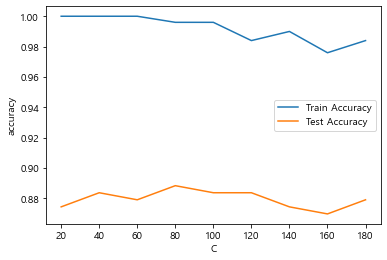

In [99]:
# 모델 정확도 그래프 확인
plt.plot(para_batch, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_batch, test_accuracy, linestyle="-", label="Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend()


> train 데이터에는 과적합 경향  
> 데이터 성능을 고려하여 80 선택

In [100]:
# 그래프를 통해 얻은 최종 모델
nn_final1=MLPClassifier(random_state=4321, batch_size=80, solver="adam", activation="tanh", hidden_layer_sizes=(60, 60))
nn_final1.fit(df_train_x, df_train_y)

# 예측
y_pred=nn_final1.predict(df_test_x)
# train 데이터 셋 정확도
print("Accuracy on training set: {0:.3f}\n".format(nn_final1.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {0:.3f}\n".format(nn_final1.score(df_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.996

Accuracy on test set: 0.888

Confusion matrix: 
[[133  13]
 [ 11  58]]


> train 데이터의 분류율은 99.6%, test 데이터의 분류율은 88.8%로 train 데이터에 과적합 되어있다.

- GridSearchCV를 이용한 최적 parameter 찾기

In [101]:
para_hidden=[(20*hidden, 20*hidden) for hidden in range(1, 9)]

In [102]:
estimator=MLPClassifier(random_state=4321)
# 구하고자 하는 parameter와 범위
param_grid={"batch_size":para_batch, "solver":para_solver, "activation":para_function, "hidden_layer_sizes":para_hidden}
# 설명력이 높은 최적 parameter 찾기
grid_nn = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_nn.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_nn.best_estimator_))
print("\nbest parameter: \n{}".format(grid_nn.best_params_))
print("\nbest score: \n{}".format(grid_nn.best_score_.round(3)))

best estimator model: 
MLPClassifier(batch_size=20, hidden_layer_sizes=(140, 140), random_state=4321,
              solver='lbfgs')

best parameter: 
{'activation': 'relu', 'batch_size': 20, 'hidden_layer_sizes': (140, 140), 'solver': 'lbfgs'}

best score: 
0.898


In [103]:
# GridSearchCV를 통해 얻은 최종 모델
nn_final2=MLPClassifier(random_state=4321, batch_size=20, solver="lbfgs", activation="relu", hidden_layer_sizes=(140, 140))
nn_final2.fit(df_train_x, df_train_y)

# 예측
y_pred=nn_final2.predict(df_test_x)
# train 데이터 셋 정확도
print("Accuracy on training set: {0:.3f}\n".format(nn_final2.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {0:.3f}\n".format(nn_final2.score(df_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 1.000

Accuracy on test set: 0.847

Confusion matrix: 
[[134  12]
 [ 21  48]]


> train 데이터의 분류율은 100%, test 데이터의 분류율은 84.7%로 train 데이터에 과적합 되어있다.

- 최종 모델 선택

    - train 데이터의 분류율은 nn_final2 모델이 더 좋으나, test 데이터의 분류율은 nn_final1 모델이 더 좋다.  
      test 데이터으 성능과 과적합을 고려하여 최종 모델로 nn_final1 선택

In [104]:
# 최종 모델
nn_final=MLPClassifier(random_state=4321, batch_size=80, solver="adam", activation="tanh", hidden_layer_sizes=(60, 60))
nn_final.fit(df_train_x, df_train_y)

# 예측
y_pred=nn_final.predict(df_test_x)
# train 데이터 셋 정확도
print("Accuracy on training set: {0:.3f}\n".format(nn_final.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {0:.3f}\n".format(nn_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.996

Accuracy on test set: 0.888

Confusion matrix: 
[[133  13]
 [ 11  58]]


> train 데이터의 분류율은 99.6%, test 데이터의 분류율은 88.8%로 train 데이터에 과적합 되어있다.

# KNN

In [105]:
knn_uncustomized=KNeighborsClassifier()
knn_uncustomized.fit(df_train_x, df_train_y)
# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(knn_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(knn_uncustomized.score(df_test_x, df_test_y)))


Accuracy on training set: 0.872
Accuracy on test set: 0.823


> 모델 정확도는 train 87.2%, test 82.3%로 train 데이터에 과적합

- 이웃 수 증가에 따른 정확도 변화

In [106]:
# train 및 test 설명력 결과 저장
train_accuracy=[]; test_accuracy=[]
# 최대 이웃 수 : 1~15
para_n_neighbors=[i for i in range(1, 16)]

for v_n_neighbors in para_n_neighbors:
    knn=KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_n_neighbors=pd.DataFrame()
df_accuracy_n_neighbors["Neighbors"]=para_n_neighbors
df_accuracy_n_neighbors["Trainaccuracy"]=train_accuracy
df_accuracy_n_neighbors["Testaccuracy"]=test_accuracy

# 모델 정확도 확인
df_accuracy_n_neighbors.round(3)

,Neighbors,Trainaccuracy,Testaccuracy
0,1,1.000,0.772
1,2,0.878,0.786
2,3,0.900,0.809
3,4,0.874,0.800
4,5,0.872,0.823
5,6,0.860,0.814
6,7,0.856,0.823
7,8,0.846,0.819
8,9,0.846,0.805
9,10,0.844,0.805


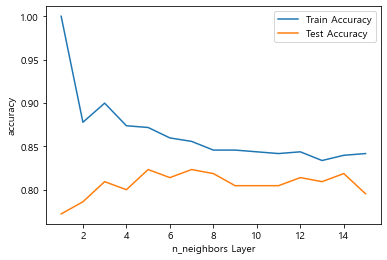

In [107]:
# 모델 정확도 그래프 확인
plt.plot(para_n_neighbors, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle="-", label="Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("n_neighbors Layer")
plt.legend()

> 군집이 1개일 때 Train 데이터의 정확도는 1  
> 군집이 2개가 되면서 Test 데이터의 정확도가 증가, Train 데이터 정확도 감소  
> test 데이터의 성능을 고려하여 7 선택

- 가중치별 이웃 수 증가에 따른 정확도 변화

In [108]:
# train 및 test 설명력 결과 저장
train_accuracy=[]; test_accuracy=[]
# 이웃 수
para_n_neighbors=[i for i in range(1, 11)]*2
# 가중치(uniform, distance)
para_weights=(["uniform"])*10 + (["distance"]*10)

# zip(list1, list2, ...)를 사용하면 list1과 list2의 인덱스별 값을 하나씩 가져옴
# 1번 loop: n_neighbors=para_n_neighbors[0], weights=para_weights[0]
# 2번 loop: n_neighbors=para_n_neighbors[1], weights=para_weights[1]
for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights):
    knn=KNeighborsClassifier(n_neighbors=v_n_neighbors, weights=v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_weights=pd.DataFrame()
df_accuracy_weights["Neighbors"]=para_n_neighbors
df_accuracy_weights["Weights"]=para_weights
df_accuracy_weights["TrainAccuracy"]=train_accuracy
df_accuracy_weights["TestAccuracy"]=test_accuracy

# 모델 정확도 확인
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.772
1,2,uniform,0.878,0.786
2,3,uniform,0.900,0.809
3,4,uniform,0.874,0.800
4,5,uniform,0.872,0.823
5,6,uniform,0.860,0.814
6,7,uniform,0.856,0.823
7,8,uniform,0.846,0.819
8,9,uniform,0.846,0.805
9,10,uniform,0.844,0.805


In [109]:
# 그림을 그리기 위해 데이터의 형태를 변환
df_accuracy_weights_pivot=df_accuracy_weights.pivot(index="Neighbors", columns="Weights", values=["TrainAccuracy", "TestAccuracy"])
df_accuracy_weights_pivot                                                                            

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
1                   1.0  1.000000     0.772093  0.772093
2                   1.0  0.877756     0.772093  0.786047
3                   1.0  0.899800     0.804651  0.809302
4                   1.0  0.873747     0.790698  0.800000
5                   1.0  0.871743     0.823256  0.823256
6                   1.0  0.859719     0.823256  0.813953
7                   1.0  0.855711     0.823256  0.823256
8                   1.0  0.845691     0.818605  0.818605
9                   1.0  0.845691     0.804651  0.804651
10                  1.0  0.843687     0.800000  0.804651

In [110]:
# pivot을 이용할 경우, columns와 values이 2개의 level로 이루어지므로 하나의 level로 변환
level0=df_accuracy_weights_pivot.columns.get_level_values(0)
level1=df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns=level0+"_"+level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.772093,0.772093
2,1.0,0.877756,0.772093,0.786047
3,1.0,0.899800,0.804651,0.809302
4,1.0,0.873747,0.790698,0.800000
5,1.0,0.871743,0.823256,0.823256


<AxesSubplot:xlabel='Neighbors'>

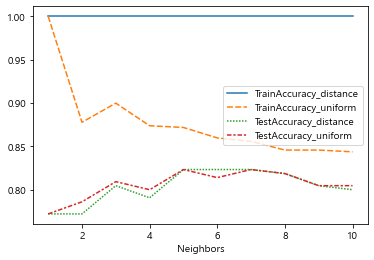

In [111]:
# 그래프 생성. 변수별 linestyle 구분
sns.lineplot(data=df_accuracy_weights_pivot)

> 가중치 distance알 때 train 데이터의 모델 정확도는 1(과대적합)  
> uniform 선택

- 거리 계산 방법별 이웃 수 증가에 따른 정확도 변화

In [112]:
# train 및 test 설명력 결과 저장
train_accuracy=[]; test_accuracy=[]
# 이웃 수
para_n_neighbors=[i for i in range(1, 11)]*3
# 거리 계산 방법(minkowski, euclidean, manhattan)
para_metric=["minkowski"]*10 + ["euclidean"]*10+["manhattan"]*10

# zip(list1, list2, ...)를 사용하면 list1과 list2의 인덱스별 값을 하나씩 가져옴
# 1번 loop: n_neighbors=para_n_neighbors[0], metric=para_metric[0]
# 2번 loop: n_neighbors=para_n_neighbors[1], metric=para_metric[1]
for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn=KNeighborsClassifier(n_neighbors=v_n_neighbors, metric=v_metric, weights="uniform")
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_metric=pd.DataFrame()
df_accuracy_metric["Neighbors"]=para_n_neighbors
df_accuracy_metric["Metric"]=para_metric
df_accuracy_metric["TrainAccuracy"]=train_accuracy
df_accuracy_metric["TestAccuracy"]=test_accuracy

# 모델 정확도 확인
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,minkowski,1.000,0.772
1,2,minkowski,0.878,0.786
2,3,minkowski,0.900,0.809
3,4,minkowski,0.874,0.800
4,5,minkowski,0.872,0.823
5,6,minkowski,0.860,0.814
6,7,minkowski,0.856,0.823
7,8,minkowski,0.846,0.819
8,9,minkowski,0.846,0.805
9,10,minkowski,0.844,0.805


<AxesSubplot:xlabel='Neighbors'>

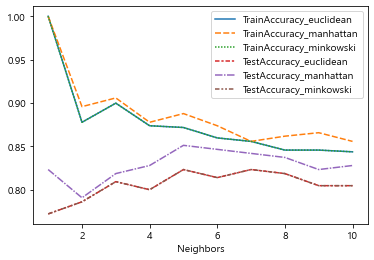

In [113]:
# 정확도를 그래프로 그림
df_accuracy_metric_pivot=df_accuracy_metric.pivot(index="Neighbors", columns="Metric", values=["TrainAccuracy", "TestAccuracy"])

level0=df_accuracy_metric_pivot.columns.get_level_values(0)
level1=df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns=level0+"_"+level1

sns.lineplot(data=df_accuracy_metric_pivot)

> 전체적으로 manhattan 거리 계산 방법이 성능이 더 좋다

In [114]:
# 그래프를 통해 얻은 최종 모델
knn_final1=KNeighborsClassifier(n_neighbors=7, weights="uniform", metric="manhattan")
knn_final1.fit(df_train_x, df_train_y)

# 예측
y_pred=knn_final1.predict(df_test_x)
# train 데이터 셋 정확도
print("Accuracy on training set: {0:.3f}\n".format(knn_final1.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {0:.3f}\n".format(knn_final1.score(df_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.856

Accuracy on test set: 0.842

Confusion matrix: 
[[135  11]
 [ 23  46]]


> train 데이터의 분류율은 85.6%, test 데이터의 분류율은 84.2%로 비슷한 수준을 보인다.

- GridSearchCV를 이용한 최적 parameter 찾기

In [115]:
estimator=KNeighborsClassifier()
# 구하고자 하는 parameter와 범위
param_grid={"n_neighbors":para_n_neighbors, "weights":para_weights, "metric":para_metric}
# 정확도가 높은 최적 parameter 찾기
grid_svc = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_svc.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_svc.best_estimator_))
print("\nbest parameter: \n{}".format(grid_svc.best_params_))
print("\nbest score: \n{}".format(grid_svc.best_score_.round(3)))

best estimator model: 
KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

best parameter: 
{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

best score: 
0.848


In [116]:
# GridSearchCV를 통해 얻은 최종 모델
knn_final2=KNeighborsClassifier(n_neighbors=7, weights="distance", metric="manhattan")
knn_final2.fit(df_train_x, df_train_y)

# 예측
y_pred=knn_final2.predict(df_test_x)
# train 데이터 셋 정확도
print("Accuracy on training set: {0:.3f}\n".format(knn_final2.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {0:.3f}\n".format(knn_final2.score(df_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 1.000

Accuracy on test set: 0.842

Confusion matrix: 
[[135  11]
 [ 23  46]]


> train 데이터의 분류율은 100%, test 데이터의 분류율은 84.2%로 train 데이터에 과대적합 되어있다.

- 최종 모델 선택

    - test 데이터의 분류율은 같지만 train 데이터의 분류율은 knn_final2 모델이 100%로 과대적합이 일어남.  
    - 과적합을 고려하여 최종 모델로 knn_final1 선택

In [117]:
# 최종 모델
knn_final=KNeighborsClassifier(n_neighbors=7, weights="uniform", metric="manhattan")
knn_final.fit(df_train_x, df_train_y)

# 예측
y_pred=knn_final.predict(df_test_x)
# train 데이터 셋 정확도
print("Accuracy on training set: {0:.3f}\n".format(knn_final.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {0:.3f}\n".format(knn_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.856

Accuracy on test set: 0.842

Confusion matrix: 
[[135  11]
 [ 23  46]]


> train 데이터의 분류율은 85.6%, test 데이터의 분류율은 84.2%로 비슷한 수준을 보인다.

> - 예측 정확도 : 0.842
> - 이웃 수 : 7
> - 가중치 : 균일(uniform)
> - 거리계산 : manhattan

#  모델 평가

- 평가 저장

In [118]:
# 분석 모델
model=["LogisticRegression", "DecisionTree", "RandomForest", "GradientBoosting", "SVM", "NeuralNet", "KNN"]

# 정확도 저장
train_accuracy=[]; test_accuracy=[]
# f1 score 저장
model_f1_score=[]
# auc score 저장
model_auc=[]

- 로지스틱 회귀분석

In [119]:
df_train

,SCALE,STEEL_KIND,FUR_NO,HSB,WORK_GR,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,ROLLING_TEMP_T5,ROLLING_DESCALING,PT_DSY
580,0,C,3호기,적용,3조,-0.709660,-0.180996,1.449500,-0.909780,1.005618,1.274156,-0.336269,0.813071,-0.802809,0.923801,0.611741,1.034063,-1.050214
404,0,T,2호기,적용,4조,0.159953,-2.028344,-0.588563,-0.813742,-0.994413,-0.742171,-1.426222,-0.901606,-0.210698,-0.843541,-1.745139,-0.202656,-0.338108
20,0,T,1호기,적용,1조,1.299821,-1.788319,-0.718227,-0.108389,1.005618,-2.182404,1.160057,-1.930413,0.278900,0.747067,-1.243352,-1.439374,-0.338082
234,1,C,2호기,적용,2조,-0.155484,-0.922915,-0.004281,0.055037,1.005618,-1.078225,0.636602,-0.330047,-1.423098,-0.865633,1.052706,-0.202656,0.374015
521,0,C,1호기,적용,4조,-1.130256,0.922430,0.543670,-1.108715,-0.994413,0.506032,1.111665,-0.787295,3.313117,1.321453,-0.604713,1.034063,-1.050210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,1,C,3호기,적용,2조,-0.155484,-0.922915,-0.004281,0.055037,-0.994413,-0.982210,0.173072,-0.158580,-0.336781,-0.887724,0.991883,-0.202656,0.374015
146,1,C,2호기,적용,4조,-0.369959,-0.395888,0.154027,1.317248,-0.994413,0.986110,-0.376217,1.098850,-0.752606,0.305232,1.143940,-0.821015,1.798239
186,0,C,3호기,적용,4조,-0.155484,0.037786,0.868408,2.031076,1.005618,0.362008,-0.584415,0.527291,0.347250,-0.202879,0.809415,-0.202656,1.086116
248,0,C,3호기,적용,2조,-0.764735,-0.528509,0.215813,-0.239129,1.005618,-0.310101,-0.457757,0.070044,-1.013008,-0.710990,0.474890,1.034063,0.373971


         Current function value: 0.261517
         Iterations: 35


C:\Users\82105\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


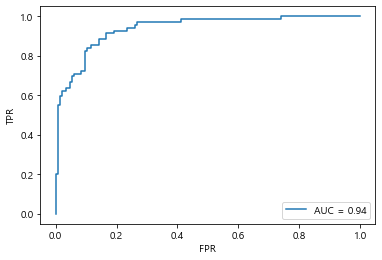

In [120]:
# 모델 생성

log_model=Logit.from_formula("""SCALE~C(STEEL_KIND)+C(FUR_NO)+C(HSB)+C(WORK_GR)+PT_THK+PT_WDTH+PT_LTH+PT_WGT+\
FUR_NO_ROW+FUR_HZ_TEMP+FUR_HZ_TIME+FUR_SZ_TEMP+FUR_SZ_TIME+FUR_TIME+ROLLING_TEMP_T5+ROLLING_DESCALING+PT_DSY""", df_train)

# 적합
log_result=log_model.fit()

# train/test 데이터 예측
y_pred_train =log_result.predict(df_train)
y_pred_test=log_result.predict(df_test)

# 0과 1의 값을 가진 class로 변환
y_pred_train_class=(y_pred_train>0.5).astype(int)
y_pred_test_class=(y_pred_test>0.5).astype(int)

# train 정확도
train_accuracy.append(accuracy_score(df_train["SCALE"], y_pred_train_class))
# test 정확도
test_accuracy.append(accuracy_score(df_test["SCALE"], y_pred_test_class))

# roc_curve(실제값, 예측값), fpr=FP/(FP+TN): 거짓 양성 비율, tpr=TP/(TP+FN):진짜 양성 비율(재현율)
fpr, tpr, thresholds=roc_curve(df_test["SCALE"], y_pred_test)
roc_auc=auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

# roc curve 그리기, label에 auc 표시(소수점 2자리)
plt.plot(fpr, tpr, label="AUC = %0.2f"%roc_auc)
plt.legend(loc="lower right")
plt.ylabel("TPR");plt.xlabel("FPR")
plt.show()

In [121]:
# f1 스코어
model_f1_score.append(f1_score(df_test_y, y_pred))

- 의사결정나무

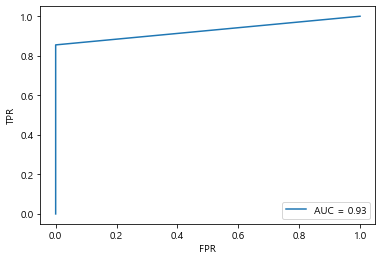

In [122]:
# 모델 생성
dt_model=DecisionTreeClassifier(random_state=4321, min_samples_split=40, min_samples_leaf=8, max_depth=10)
dt_model.fit(df_train_x, df_train_y)

# train 정확도
train_accuracy.append(dt_model.score(df_train_x, df_train_y))
# test 정확도
test_accuracy.append(dt_model.score(df_test_x, df_test_y))

# 예측값
y_pred=dt_model.predict(df_test_x)

# roc_curve(실제값, 예측값), fpr=FP/(FP+TN): 거짓 양성 비율, tpr=TP/(TP+FN):진짜 양성 비율(재현율)
fpr, tpr, thresholds=roc_curve(df_test_y, y_pred)
roc_auc=auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

# roc curve 그리기, label에 auc 표시(소수점 2자리)
plt.plot(fpr, tpr, label="AUC = %0.2f"%roc_auc)
plt.legend(loc="lower right")
plt.ylabel("TPR");plt.xlabel("FPR")
plt.show()

In [123]:
# f1 스코어
model_f1_score.append(f1_score(df_test_y, y_pred))

- 랜덤 포레스트

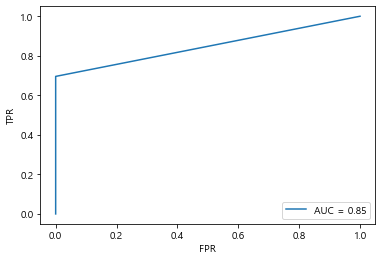

In [124]:
# 모델 생성
rf_model=RandomForestClassifier(random_state=4321, n_estimators=60, min_samples_leaf=10, min_samples_split=10, max_depth=3)
rf_model.fit(df_train_x, df_train_y)

# train 정확도
train_accuracy.append(rf_model.score(df_train_x, df_train_y))
# test 정확도
test_accuracy.append(rf_model.score(df_test_x, df_test_y))

# 예측값
y_pred=rf_model.predict(df_test_x)

# roc_curve(실제값, 예측값), fpr=FP/(FP+TN): 거짓 양성 비율, tpr=TP/(TP+FN):진짜 양성 비율(재현율)
fpr, tpr, thresholds=roc_curve(df_test_y, y_pred)
roc_auc=auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

# roc curve 그리기, label에 auc 표시(소수점 2자리)
plt.plot(fpr, tpr, label="AUC = %0.2f"%roc_auc)
plt.legend(loc="lower right")
plt.ylabel("TPR");plt.xlabel("FPR")
plt.show()

In [125]:
# f1 스코어
model_f1_score.append(f1_score(df_test_y, y_pred))

- 그래디언트 부스팅

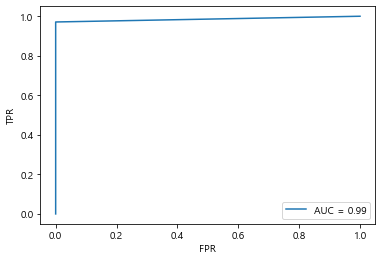

In [126]:
# 모델 생성
gb_model=GradientBoostingClassifier(random_state=4321, min_samples_leaf=2, learning_rate=0.5, n_estimators=50, min_samples_split=40, max_depth=6)
gb_model.fit(df_train_x, df_train_y)

# train 정확도
train_accuracy.append(gb_model.score(df_train_x, df_train_y))
# test 정확도
test_accuracy.append(gb_model.score(df_test_x, df_test_y))

# 예측값
y_pred=gb_model.predict(df_test_x)

# roc_curve(실제값, 예측값), fpr=FP/(FP+TN): 거짓 양성 비율, tpr=TP/(TP+FN):진짜 양성 비율(재현율)
fpr, tpr, thresholds=roc_curve(df_test_y, y_pred)
roc_auc=auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

# roc curve 그리기, label에 auc 표시(소수점 2자리)
plt.plot(fpr, tpr, label="AUC = %0.2f"%roc_auc)
plt.legend(loc="lower right")
plt.ylabel("TPR");plt.xlabel("FPR")
plt.show()

In [127]:
# f1 스코어
model_f1_score.append(f1_score(df_test_y, y_pred))

- SVM

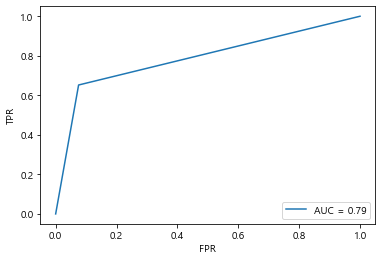

In [128]:
# 모델 생성
svc_model=SVC(random_state=4321, gamma=0.1, C=0.7)
svc_model.fit(df_train_x, df_train_y)

# train 정확도
train_accuracy.append(svc_model.score(df_train_x, df_train_y))
# test 정확도
test_accuracy.append(svc_model.score(df_test_x, df_test_y))
    
# 예측값
y_pred=svc_model.predict(df_test_x)

# roc_curve(실제값, 예측값), fpr=FP/(FP+TN): 거짓 양성 비율, tpr=TP/(TP+FN):진짜 양성 비율(재현율)
fpr, tpr, thresholds=roc_curve(df_test_y, y_pred)
roc_auc=auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

# roc curve 그리기, label에 auc 표시(소수점 2자리)
plt.plot(fpr, tpr, label="AUC = %0.2f"%roc_auc)
plt.legend(loc="lower right")
plt.ylabel("TPR");plt.xlabel("FPR")
plt.show()

In [129]:
# f1 스코어
model_f1_score.append(f1_score(df_test_y, y_pred))

- 인공 신경망

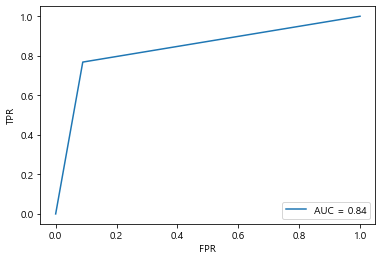

In [130]:
# 모델 생성
nn_model=MLPClassifier(random_state=4321, batch_size=100, solver="adam", activation="tanh", hidden_layer_sizes=(40, 40))
nn_model.fit(df_train_x, df_train_y)

# train 정확도
train_accuracy.append(nn_model.score(df_train_x, df_train_y))
# test 정확도
test_accuracy.append(nn_model.score(df_test_x, df_test_y))

# 예측값
y_pred=nn_model.predict(df_test_x)

# roc_curve(실제값, 예측값), fpr=FP/(FP+TN): 거짓 양성 비율, tpr=TP/(TP+FN):진짜 양성 비율(재현율)
fpr, tpr, thresholds=roc_curve(df_test_y, y_pred)
roc_auc=auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

# roc curve 그리기, label에 auc 표시(소수점 2자리)
plt.plot(fpr, tpr, label="AUC = %0.2f"%roc_auc)
plt.legend(loc="lower right")
plt.ylabel("TPR");plt.xlabel("FPR")
plt.show()

In [131]:
# f1 스코어
model_f1_score.append(f1_score(df_test_y, y_pred))

- KNN

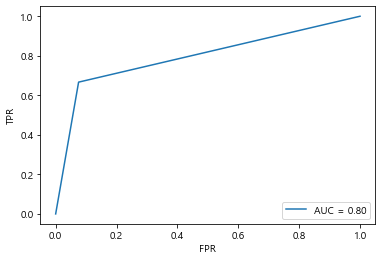

In [132]:
# 모델 생성
knn_model=KNeighborsClassifier(n_neighbors=7, weights="uniform", metric="manhattan")
knn_model.fit(df_train_x, df_train_y)

# train 정확도
train_accuracy.append(knn_model.score(df_train_x, df_train_y))
# test 정확도
test_accuracy.append(knn_model.score(df_test_x, df_test_y))

# 예측값
y_pred=knn_model.predict(df_test_x)

# roc_curve(실제값, 예측값), fpr=FP/(FP+TN): 거짓 양성 비율, tpr=TP/(TP+FN):진짜 양성 비율(재현율)
fpr, tpr, thresholds=roc_curve(df_test_y, y_pred)
roc_auc=auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

# roc curve 그리기, label에 auc 표시(소수점 2자리)
plt.plot(fpr, tpr, label="AUC = %0.2f"%roc_auc)
plt.legend(loc="lower right")
plt.ylabel("TPR");plt.xlabel("FPR")
plt.show()

In [133]:
# f1 스코어
model_f1_score.append(f1_score(df_test_y, y_pred))

- 모델별 정확도 표, bar plot 생성

In [134]:
# 모델별 정확도 표
df_eval=pd.DataFrame(index=model)
df_eval["TrainAccuracy"]=train_accuracy
df_eval["TestAccuracy"]=test_accuracy
df_eval["F1Score"]=model_f1_score
df_eval["AUC"]=model_auc
df_eval.round(3)

,TrainAccuracy,TestAccuracy,F1Score,AUC
LogisticRegression,0.882,0.856,0.730,0.939
DecisionTree,0.986,0.953,0.922,0.928
RandomForest,0.924,0.902,0.821,0.848
GradientBoosting,1.000,0.991,0.985,0.986
SVM,0.918,0.837,0.720,0.788
NeuralNet,0.990,0.865,0.785,0.840
KNN,0.856,0.842,0.730,0.796


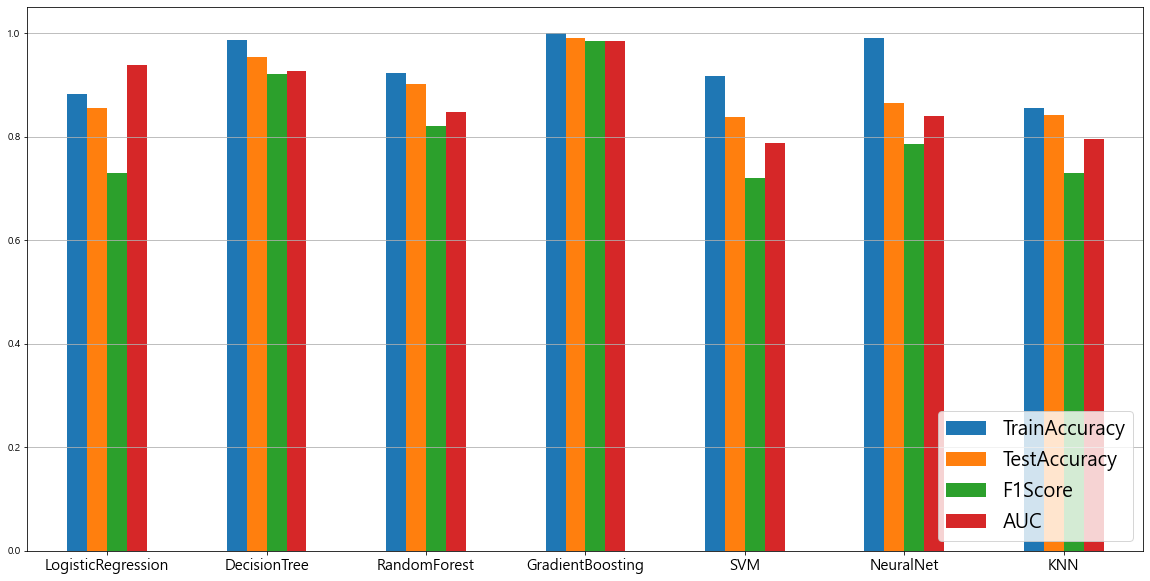

In [135]:
# 정확도 bar plot 생성
df_eval.plot.bar(rot=0, figsize=(20, 10))
plt.legend(loc="lower right", fontsize=20)
plt.xticks(fontsize=15)
plt.grid(axis="y")

> GradientBoosting 모델이 가장 높은 정확도와 F1 score, AUC를 보임  

> GradientBoosting > DecisionTree > RandomForest > NeuraNet >  
> Logistic Regression  > KNN > SVM